In [144]:
%pip install squarify
%pip install geopandas
%pip install matplotlib

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import squarify
import geopandas as gp
from sklearn.model_selection import train_test_split

In [146]:
propiedades = pd.read_csv('./properati_argentina_2021.csv')
coordenadas_bsas = gp.read_file(r'./barrios.geojson.json')

# Preprocesamiento de los Datos

## Filtrado del Dataset

### Analisis Exploratorio

Comenzamos con un primer paneo del dataframe. Usamos el metodo "info" y "shape", para ver cuantas filas son, cuantas columnas son, que son las variables, etc.

In [147]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [148]:
propiedades.shape

(460154, 20)

De esta manera, notamos que el dataframe consta de 460154 filas y 20 columnas que detallan ubicacion, precio, caracteristicas, entre otros detalles de cada propiedad.

### Seleccion de Datos

Ahora realizamos los filtrados iniciales solicitados. Ademas checkeamos que se filtre correctamente el dataframe, y antes y despues de cada filtro observamos las filas resultantes.



El primer filtro se hace en base a los *tipos* de propiedades:

In [149]:
propiedades['property_type'].value_counts()

property_type
Departamento       231358
Casa               120768
Lote                28748
PH                  25910
Local comercial     20546
Oficina             16085
Otro                 7713
Cochera              4111
Depósito             4050
Casa de campo         865
Name: count, dtype: int64

In [150]:
propiedades_filtradas = propiedades[(propiedades['property_type'] == 'Casa') |
                                    (propiedades['property_type'] == 'PH') |
                                    (propiedades['property_type'] == 'Departamento')]

print(f'{"Cantidad de filas: "}{propiedades_filtradas.shape[0]}')
print(f'{"Cantidad de columnas: "}{propiedades_filtradas.shape[1]}')

Cantidad de filas: 378036
Cantidad de columnas: 20


In [151]:
propiedades_filtradas['property_type'].value_counts()

property_type
Departamento    231358
Casa            120768
PH               25910
Name: count, dtype: int64

El segundo filtro se realiza en base a la variable *place_l2*, es decir, la *ciudad* de las propiedades:

In [152]:
propiedades['place_l2'].value_counts()

place_l2
Capital Federal                 157563
Bs.As. G.B.A. Zona Norte         89693
Santa Fe                         47861
Bs.As. G.B.A. Zona Sur           47754
Bs.As. G.B.A. Zona Oeste         28352
Córdoba                          22528
Buenos Aires Costa Atlántica     12457
Neuquén                           8788
Montevideo                        7494
Buenos Aires Interior             6274
Maldonado                         5540
Mendoza                           5395
Río Negro                         5280
Tucumán                           3571
Colonia                           2535
Salta                             1537
Entre Ríos                        1216
San Juan                           997
La Pampa                           783
Canelones                          744
Chubut                             701
San Luis                           677
Misiones                           529
Florida                            411
Jujuy                              406
Corrientes      

In [153]:
propiedades_filtradas = propiedades_filtradas[propiedades_filtradas['place_l2'] == 'Capital Federal']

print(f'{"Cantidad de filas: "}{propiedades_filtradas.shape[0]}')
print(f'{"Cantidad de columnas: "}{propiedades_filtradas.shape[1]}')

Cantidad de filas: 132921
Cantidad de columnas: 20


In [154]:
propiedades_filtradas['place_l2'].value_counts()

place_l2
Capital Federal    132921
Name: count, dtype: int64

El 3er filtro se realiza en base al tipo de *operacion* de las propiedades:

In [155]:
propiedades['operation'].value_counts()

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

In [156]:
propiedades_filtradas = propiedades_filtradas[(propiedades_filtradas['operation'] == 'Venta') & (propiedades_filtradas['property_currency'] == 'USD')]

print(f'{"Cantidad de filas: "}{propiedades_filtradas.shape[0]}')
print(f'{"Cantidad de columnas: "}{propiedades_filtradas.shape[1]}')

Cantidad de filas: 94249
Cantidad de columnas: 20


In [157]:
propiedades_filtradas['operation'].value_counts()

operation
Venta    94249
Name: count, dtype: int64

Podemos ver que luego de los tres filtros iniciales de *tipo, ubicacion y operacion*, nos quedan 94249 propiedades posibles en el dataframe.

### Variables Irrelevantes

Llegado a este punto, comenzamos a analizar mas en profundidad a las variables, en busqueda de aquellas que no aporten informacion y deban ser eliminadas.

Primero, vemos el porcentaje de nulos de las variables.

In [158]:
(propiedades_filtradas.isna().sum() / len(propiedades_filtradas)) * 100

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.957602
longitud                      3.957602
place_l2                      0.000000
place_l3                      0.442445
place_l4                     96.134707
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.107704
property_bedrooms            11.657418
property_surface_total        5.139577
property_surface_covered      3.558658
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64

Con esta lista, sale a la vista que el 100% de los datos de las variables *place_l5* y *place_l6* son nulas. En conclusion, no son relevantes para el análisis y tomamos la decisión de eliminarlas.

In [159]:
columnas_a_eliminar = ['place_l5', 'place_l6']
propiedades_filtradas.drop(columnas_a_eliminar, axis = 'columns' , inplace = True)

<ipython-input-159-80d29c2eb744>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propiedades_filtradas.drop(columnas_a_eliminar, axis = 'columns' , inplace = True)


Ademas, gracias al filtrado que realizamos, tenemos tres variables que en realidad son constantes, es decir, tienen un solo valor:

1.   *place_l2*
2.   *operation*
3.   *property_currency*

Por lo tanto, considerando que ya sabemos la informacion que aportan estas variables, concluimos que no aportan nada que valga la pena dejarlas en el dataframe y las eliminamos.

In [160]:
columnas_a_eliminar = ['place_l2', 'operation', 'property_currency']
propiedades_filtradas.drop(columnas_a_eliminar, axis = 'columns' , inplace = True)

Y en base a los nombres de las columnas, notamos que *start_date* y *created_on* pueden ser similares o hasta iguales. Por ende creamos una funcion que itere y compare las variables, en caso que devuelva True, brindan la misma informacion, son iguales, y podemos eliminar una de ellas.

In [161]:
start_date = propiedades_filtradas['start_date'].tolist()
created_on = propiedades_filtradas['created_on'].tolist()
i = 0
columnas_duplicadas = True
while i <= len(created_on) & columnas_duplicadas:
  if start_date[i] != created_on[i]:
    columnas_duplicadas = False
  i += 1
print(columnas_duplicadas)

True


Efectivamente, observamos que son iguales. Por lo tanto la información de *created_on* es redundante y la eliminamos.

In [162]:
propiedades_filtradas.drop(['created_on'], axis = 'columns' , inplace = True)

### Nombre de las Variables

Ahora que ya filtramos el dataframe y eliminamos las variables irrelevantes, hacemos un rename para describir mejor a las variables *place_lx*. Ademas, pasamos todos los nombres a español.

In [163]:
propiedades_filtradas.rename(columns = {'start_date': 'fecha_inicio',
                                        'end_date': 'fecha_fin',
                                        'place_l3': 'barrio',
                                        'place_l4': 'subdivision',
                                        'property_type': 'tipo',
                                        'property_rooms': 'ambientes',
                                        'property_bedrooms': 'dormitorios',
                                        'property_surface_total': 'superficie_total',
                                        'property_surface_covered': 'superficie_cubierta',
                                        'property_price': 'precio',
                                        'property_title': 'nombre'},
                              inplace = True)

print(f'{"La lista resultante de variables es: "}')
propiedades_filtradas.columns.tolist()

La lista resultante de variables es: 


['id',
 'fecha_inicio',
 'fecha_fin',
 'latitud',
 'longitud',
 'barrio',
 'subdivision',
 'tipo',
 'ambientes',
 'dormitorios',
 'superficie_total',
 'superficie_cubierta',
 'precio',
 'nombre']

### Dividir el Dataframe

Una vez hecho el filtrado correspondiente del dataset original, dividimos el dataframe en 80% train y 20% test.

In [164]:
propiedades_train, propiedades_test= train_test_split(propiedades_filtradas, test_size=0.2, random_state=42)

In [165]:
propiedades_train.shape

(75399, 14)

In [166]:
propiedades_test.shape

(18850, 14)

Confirmamos que ambos dataframes tienen la cantidad correspondiente de datos

## Exploracion Inicial de Datos

### Variables Cuantitativas

Realizamos un "describe" del dataframe para observar los minimos, maximos, cuartiles, etc. Adicionalmente, calculamos las modas de todas las variables y las concatenamos a la siguiente tabla:

In [167]:
propiedades_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitud,72420.0,-34.591358,0.188601,-53.788624,-34.615996,-34.595757,-34.577367,-2.421983e+01
longitud,72420.0,-58.449737,0.289167,-71.471192,-58.466550,-58.439146,-58.408917,-5.413333e+01
ambientes,74555.0,2.825015,1.433820,1.000000,2.000000,3.000000,4.000000,4.000000e+01
dormitorios,66597.0,2.017208,1.135236,-1.000000,1.000000,2.000000,3.000000,7.000000e+01
superficie_total,71509.0,111.841013,1079.926643,10.000000,45.000000,65.000000,105.000000,1.370000e+05
superficie_cubierta,72708.0,89.872806,1106.107524,1.000000,40.000000,58.000000,89.000000,2.170000e+05
precio,75399.0,226092.640062,318380.456420,5000.000000,95000.000000,143900.000000,238000.000000,2.140000e+07


In [168]:
propiedades_describe = propiedades_train.describe().transpose()
columna_moda = [propiedades_train["latitud"].mode()[0],
                propiedades_train["longitud"].mode()[0],
                propiedades_train["ambientes"].mode()[0],
                propiedades_train["dormitorios"].mode()[0],
                propiedades_train["superficie_total"].mode()[0],
                propiedades_train["superficie_cubierta"].mode()[0],
                propiedades_train["precio"].mode()[0]]
propiedades_describe['mode'] = columna_moda
propiedades_describe

,count,mean,std,min,25%,50%,75%,max,mode
latitud,72420.0,-34.591358,0.188601,-53.788624,-34.615996,-34.595757,-34.577367,-2.421983e+01,-34.541250
longitud,72420.0,-58.449737,0.289167,-71.471192,-58.466550,-58.439146,-58.408917,-5.413333e+01,-58.472966
ambientes,74555.0,2.825015,1.433820,1.000000,2.000000,3.000000,4.000000,4.000000e+01,3.000000
dormitorios,66597.0,2.017208,1.135236,-1.000000,1.000000,2.000000,3.000000,7.000000e+01,1.000000
superficie_total,71509.0,111.841013,1079.926643,10.000000,45.000000,65.000000,105.000000,1.370000e+05,50.000000
superficie_cubierta,72708.0,89.872806,1106.107524,1.000000,40.000000,58.000000,89.000000,2.170000e+05,40.000000
precio,75399.0,226092.640062,318380.456420,5000.000000,95000.000000,143900.000000,238000.000000,2.140000e+07,110000.000000


### Variables Cualitativas

Observamos la frecuencia absoluta y relativa de los *barrios* que hay en el dataframe

In [169]:
frecuencias_absolutas = propiedades_train['barrio'].value_counts()
frecuencias_df = pd.DataFrame()
frecuencias_df['frecuencia_absoluta'] = frecuencias_absolutas
frecuencias_df['frecuencia_relativa'] = frecuencias_absolutas / len(propiedades_train)
frecuencias_df

,frecuencia_absoluta,frecuencia_relativa
barrio,,
Palermo,11397,0.151156
Belgrano,7189,0.095346
Caballito,5722,0.075890
Recoleta,5031,0.066725
Villa Urquiza,3771,0.050014
Almagro,3222,0.042733
Nuñez,2824,0.037454
Villa Crespo,2580,0.034218
Flores,2508,0.033263


De la misma forma, tambien observamos la cantidad de *subdivisiones* existentes y sus respectivas frecuencias.

In [170]:
frecuencias_abs_palermo = propiedades_train['subdivision'].value_counts()
propiedades_de_palermo = propiedades_train[propiedades_train['barrio'] == 'Palermo']
frecuencias_palermo = pd.DataFrame()
frecuencias_palermo['frecuencia_absoluta'] = frecuencias_abs_palermo
frecuencias_palermo['frecuencia_relativa'] = frecuencias_abs_palermo / len(propiedades_de_palermo)
frecuencias_palermo

,frecuencia_absoluta,frecuencia_relativa
subdivision,,
Palermo Hollywood,1232,0.108099
Palermo Chico,856,0.075107
Palermo Soho,651,0.057120
Palermo Viejo,131,0.011494


Gracias a esto, salta a la vista que son simplemente 4 *subdivisiones* del *barrio Palermo*

Por ultimo, observamos la frecuencia relativa de los *tipos* de propiedades. Aunque ya sabemos que deberían ser 3 por el filtrado inicial, este analisis sirve para visualizar mejor su distribucion mas adelante.

In [171]:
cantidad_valores = propiedades_train['tipo'].nunique()
print("Cantidad de Tipos de Propiedades: ", cantidad_valores, '\n')
propiedades_train['tipo'].value_counts() / len(propiedades_train)

Cantidad de Tipos de Propiedades:  3 



tipo
Departamento    0.857027
PH              0.098317
Casa            0.044656
Name: count, dtype: float64

### Distribucion de las Variables

En esta parte analizamos las distribuciones de las variables con diversos graficos, ya sea como un analisis inicial o complementario de lo ya realizado.

#### Distribucion de Variables Cualitativas

Primero, un TreeMap para observar la proporcion de todos los *barrios* del dataframe.

(0.0, 100.0, 0.0, 100.0)

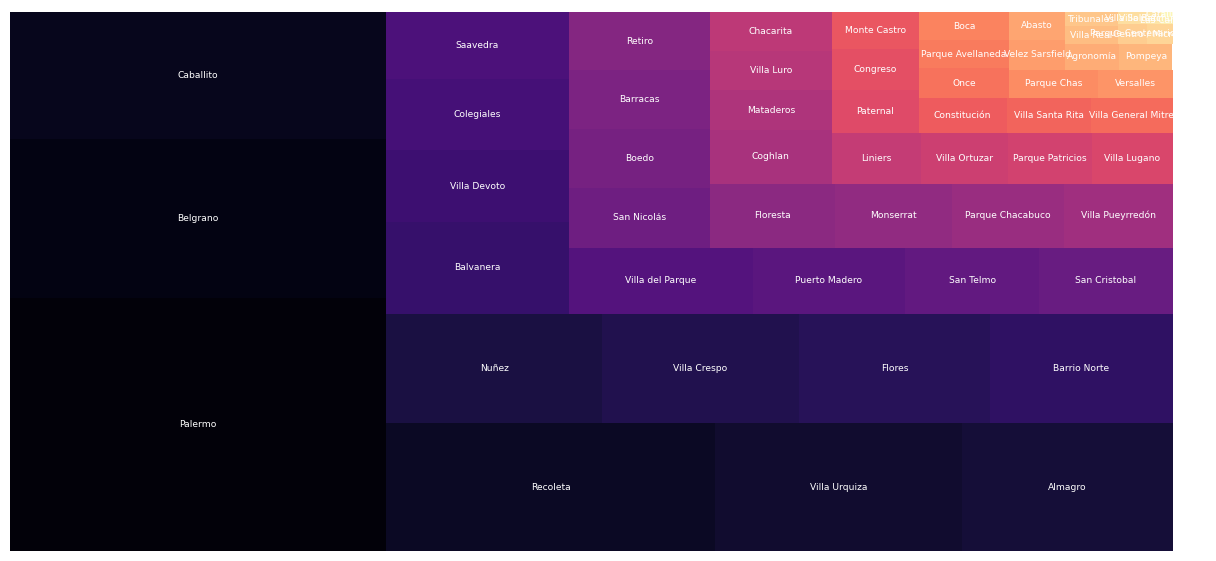

In [172]:
valores = propiedades_train['barrio'].value_counts()
llaves = propiedades_train['barrio'].value_counts().keys()
plt.figure(figsize=(15, 7))
squarify.plot(sizes=valores,
              label = llaves,
              pad = 0.0 ,
              alpha = 1,
              color=sns.color_palette("magma", len(valores)),
              text_kwargs = {'fontsize': 6.56, 'color': 'white'})
plt.axis("off")

Segundo, un CountPlot para observar la proporcion de *tipos* de propiedades y confirmamos, con en el analisis ya realizado, una gran superioridad de *departamentos* por sobre el resto.

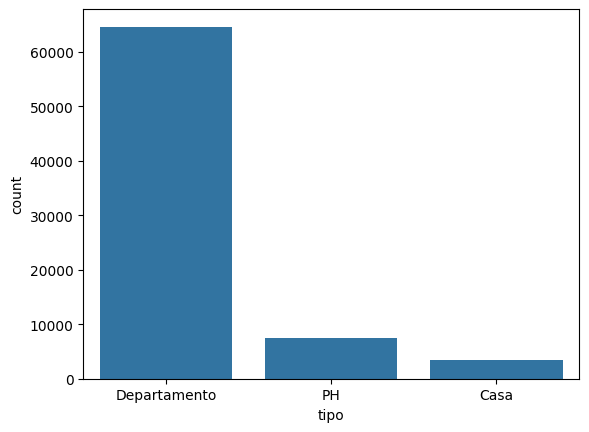

In [173]:
sns.countplot(x='tipo', data=propiedades_train)
plt.show()

#### Distribucion de Variables Cuantitativas

Tercero, un BoxPlot para observar la distribucion de la cantidad de *ambientes*. Esto tambien sirve para visualizar posibles **outliers**.

<Axes: xlabel='ambientes'>

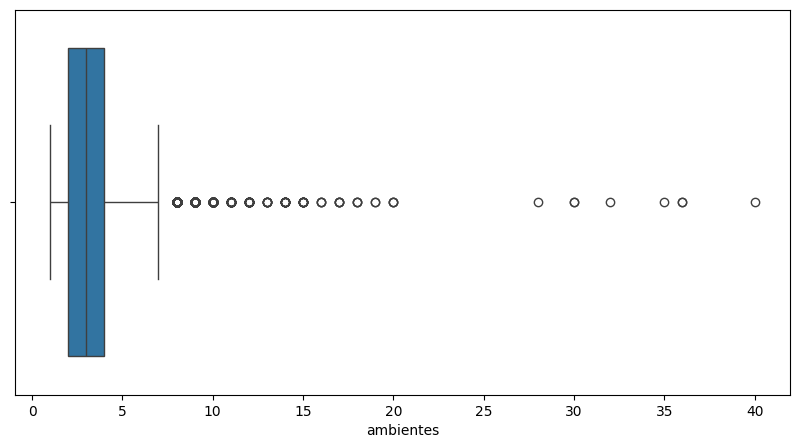

In [174]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ambientes", data=propiedades_train)

Cuarto, un BoxPlot para observar la distribucion de la *superficie total* de las propiedades. El grafico nos muestra que no solo la variable tiene **outliers**, sino que ademas esos valores no tienen sentido real, por lo que tendremos que trabajar detalladamente mas adelante.

<Axes: xlabel='superficie_total'>

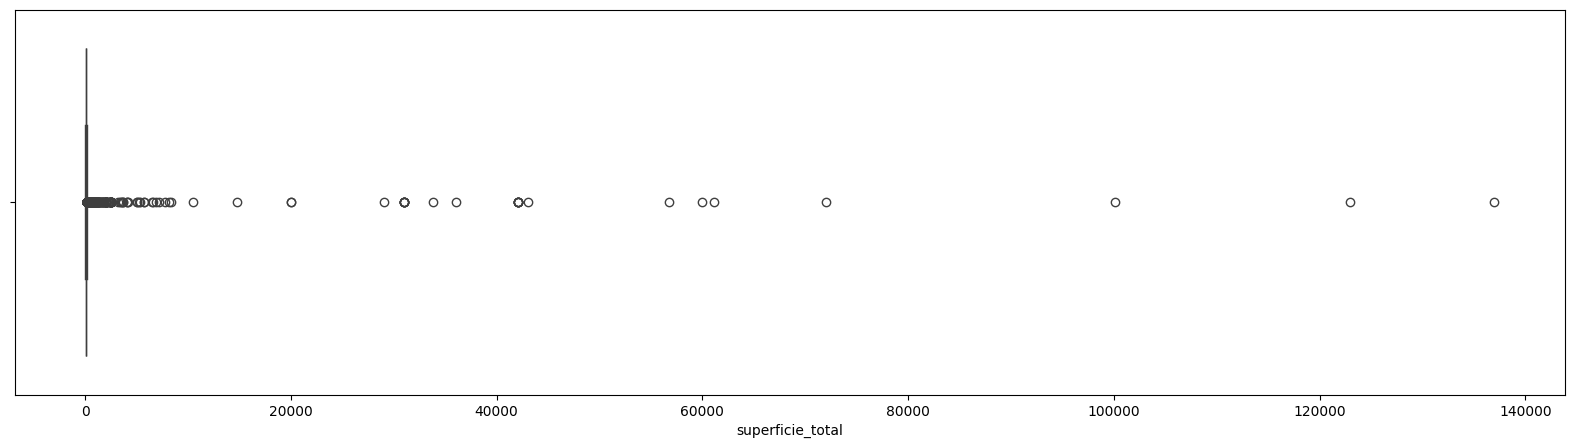

In [175]:
plt.figure(figsize=(20,5))
sns.boxplot(x="superficie_total", data=propiedades_train)

Quinto, un BoxPlot para observar la distribucion del *precio* de las propiedades. El grafico nos muestra que la variable tiene muchos outliers, y a pesar de que esos valores sean posibles, nos da la pauta de que puede haber errores que tendremos que analizar.

<Axes: xlabel='precio'>

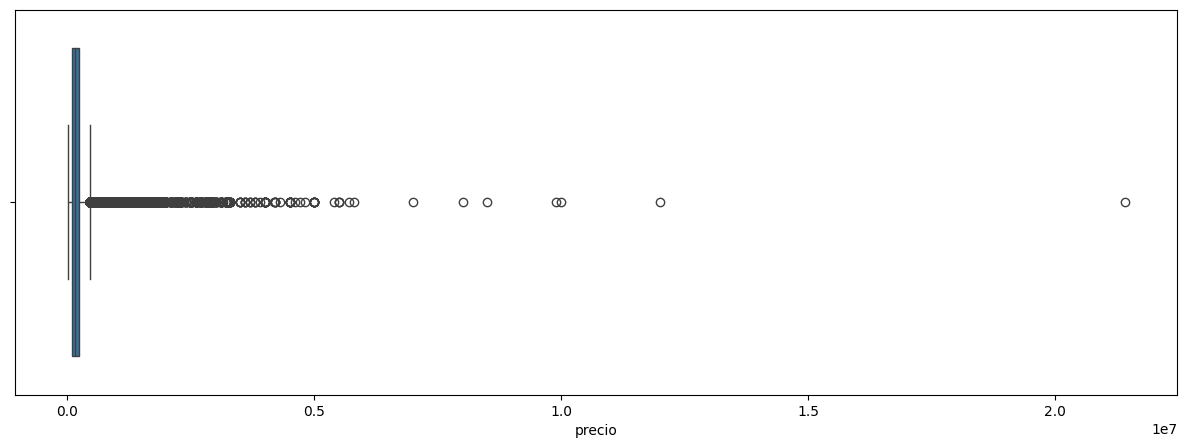

In [176]:
plt.figure(figsize=(15,5))
sns.boxplot(x="precio", data=propiedades_train)

### Correlacion Entre Variables

Con un HeatMap, buscamos rapidamente posibles correlaciones lineales entre las variables cuantitativas mediante la correlacion de Pearson.

<Axes: >

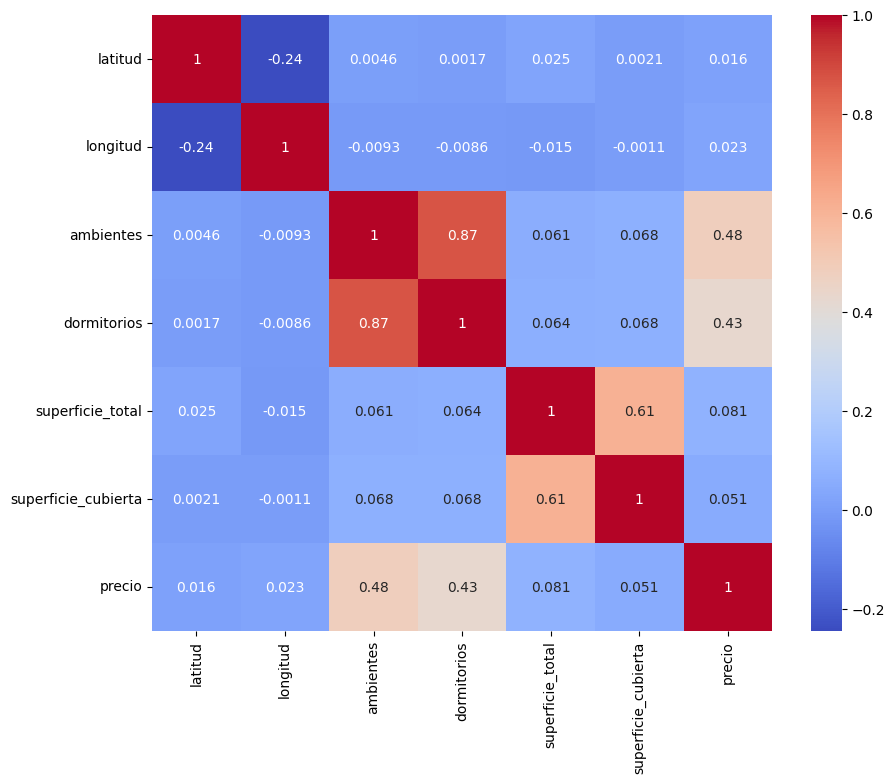

In [177]:
plt.figure(figsize = (10,8))
heatmap_de_propiedades = propiedades_train.drop(['id',
                                                 'fecha_inicio',
                                                 'fecha_fin',
                                                 'barrio',
                                                 'subdivision',
                                                 'tipo',
                                                 'nombre'],
                                                axis='columns')
sns.heatmap(heatmap_de_propiedades.corr(), annot = True, cmap='coolwarm')

In [178]:
#sns.pairplot(heatmap_de_propiedades, height=2)

Con el grafico, observamos que la mayoria de las variables no estan relacionadas entre si y aportan mucha informacion al dataset, sin embargo existen algunas relaciones lineales:


*   *Ambientes* y *dormitorios*: Una correlacion evidente ya que un dormitorio es un ambiente, lo que la hace la correlacion lineal mas fuerte del grafico.
*   *Superficie total* y *superficie cubierta*: Otra correlacion evidente ya que la *superficie cubierta* forma parte de la *superficie total*, pero a pesar de esto, no es una correlacion lineal tan fuerte.
*   *Precio* y *ambientes*: Una correlacion logica, que por transitividad se traslada tambien a la correlacion entre el *precio* y los *dormitorios*. De estas tres relaciones destacadas es la mas debil, lo cual no es raro en si, pero si es raro que no tengan una correlacion lineal un poco mas fuerte.

Por ultimo, llama la atencion que distintas variables no tengan una corelacion lineal como el *precio* y la *superficie*, o la *superficie* y el la cantidad de *ambientes*.

Ahora, intentamos ver si existe alguna correlacion entre la fecha de inicio y el precio, para intentar confirmar o descartar algun efecto inflacionario en las propiedades. Para esto, trabajamos las *fechas de inicio* por mes y los usamos en un BoxPlot.

<Axes: xlabel='mes', ylabel='precio'>

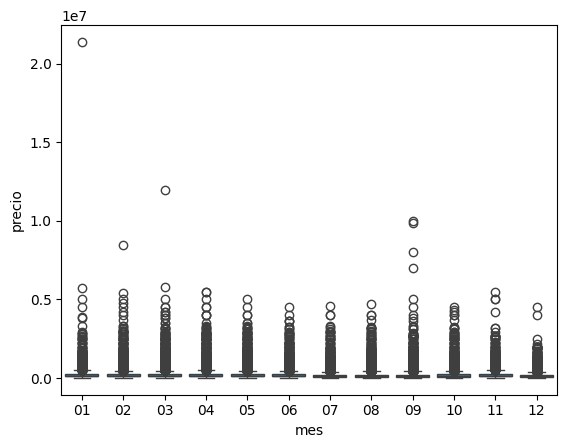

In [179]:
propiedades_por_fecha = propiedades_train.sort_values('fecha_inicio')
meses = propiedades_por_fecha['fecha_inicio'].tolist()
lista_de_meses = []
for mes in meses:
  date = mes.split('-')
  lista_de_meses.append(date[1])
propiedades_por_fecha['mes'] = lista_de_meses
sns.boxplot(x="mes", y='precio', data=propiedades_por_fecha)

Debido a la cantidad de **outliers** en todos los meses, no podemos observar ninguna correlacion entre ambas variables.
Para intentar observar si existe o no dicho efecto, realizamos dos BarPlot trabajando con la mediana y el promedio del *precio*.

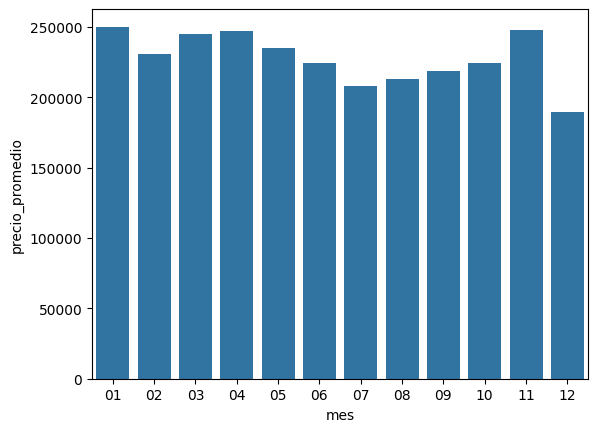

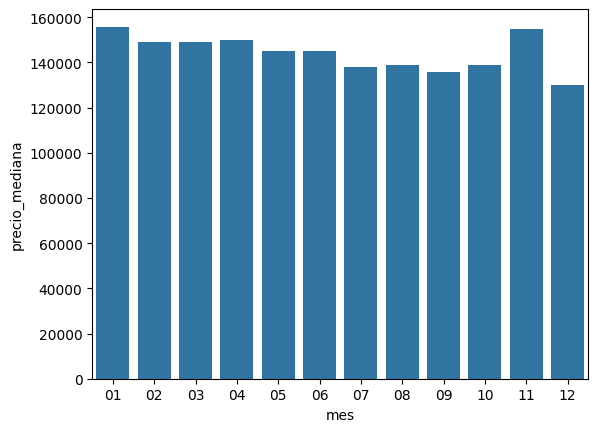

In [180]:
propiedades_por_fecha_promedio = propiedades_por_fecha.groupby(['mes'])['precio'].mean().reset_index()
propiedades_por_fecha_promedio.rename(columns = {'precio': 'precio_promedio'}, inplace = True)
sns.barplot(x='mes', y='precio_promedio', data=propiedades_por_fecha_promedio)
plt.show()

propiedades_por_fecha_mediana = propiedades_por_fecha.groupby(['mes'])['precio'].median().reset_index()
propiedades_por_fecha_mediana.rename(columns = {'precio': 'precio_mediana'}, inplace = True)
sns.barplot(x='mes', y='precio_mediana', data=propiedades_por_fecha_mediana)
plt.show()

En ambos graficos, sobre todo en el segundo en el cual vemos la mediana del *precio* por mes, observamos una correlacion lineal negativa entre las variables.
Por ende, descartamos temporalmente la posibilidad de un efecto inflacionario en las propiedades, a falta del trabajo de los **outliers** del *precio*.

## Visualizacion de Datos

En esta parte, vamos a observar la relacion entre distintas variables que no tienen un orden especifico.

### Barrios y Otras Variables

<ipython-input-181-2cf9d96cb1b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points.dropna(inplace=True)


<Axes: >

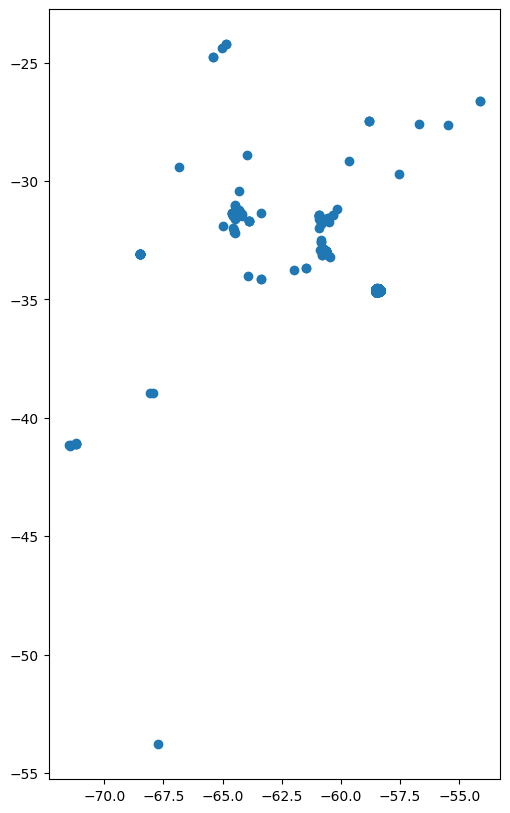

In [181]:
points = propiedades_train[['tipo','longitud','latitud']]
points.dropna(inplace=True)
points = gp.GeoDataFrame(points, geometry=gp.points_from_xy(points.longitud, points.latitud))
points.reset_index(inplace=True,drop=True)
fx, ax = plt.subplots(figsize=(10,10))
coordenadas_bsas.plot(ax=ax,column='BARRIO',alpha=0.8)
points.plot(ax=ax)

<Axes: >

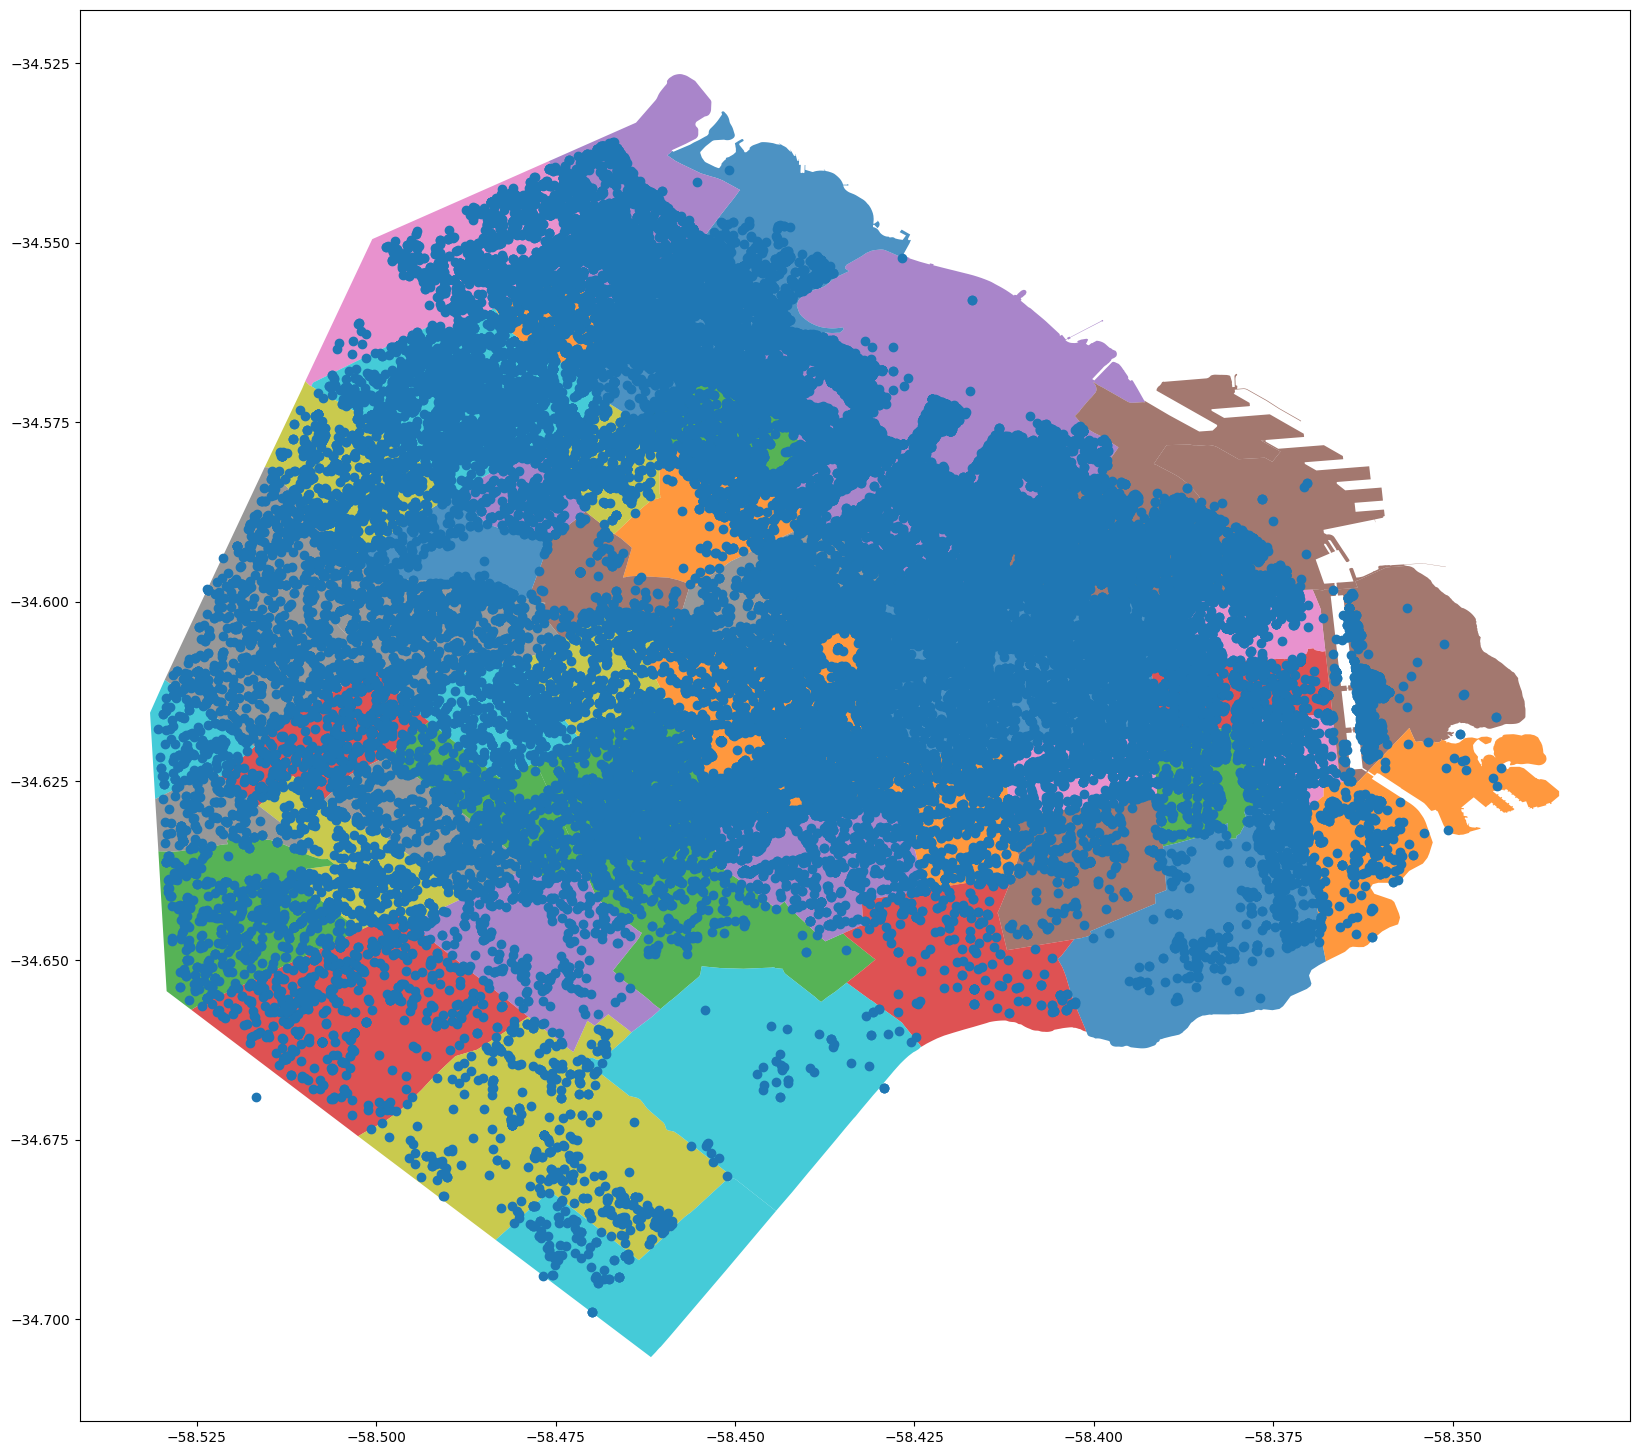

In [182]:
points.dropna(inplace=True)
points = gp.GeoDataFrame(points, geometry=gp.points_from_xy(points.longitud, points.latitud))
points = points[(points['latitud'] < -34.200000)]
points = points[(points['latitud'] > -35.000000)]
points.reset_index(inplace=True,drop=True)
fx, ax = plt.subplots(figsize=(20,20))
coordenadas_bsas.plot(ax=ax,column='BARRIO',alpha=0.8, zorder=1)
points.plot(ax=ax)

Primero, relacionamos mediante BoxPlots los *barrios* con la cantidad de *ambientes*, la cantidad de *dormitorios*, la *superficie total*, la *superficie cubierta*, y el *precio*.

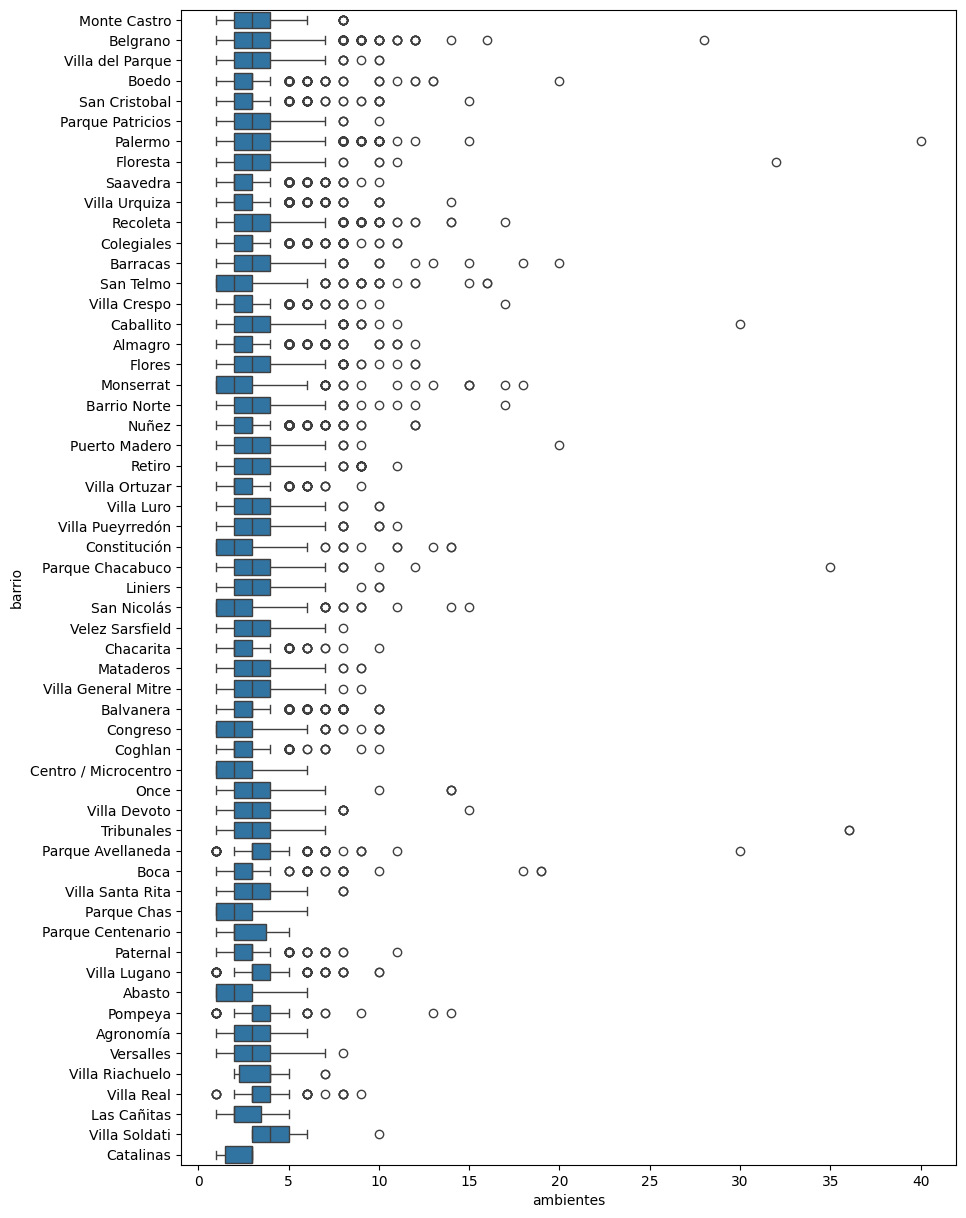

In [183]:
plt.figure(figsize = (10,15))
sns.boxplot(y='barrio', x='ambientes', data=propiedades_train)
plt.show()

Con este grafico podemos visualizar la distribucion de *ambientes* por *barrio* y ademas, nos permite comparar su distribucion, y en especial los **outliers**, con el grafico de *dormitorios* por *barrio*.

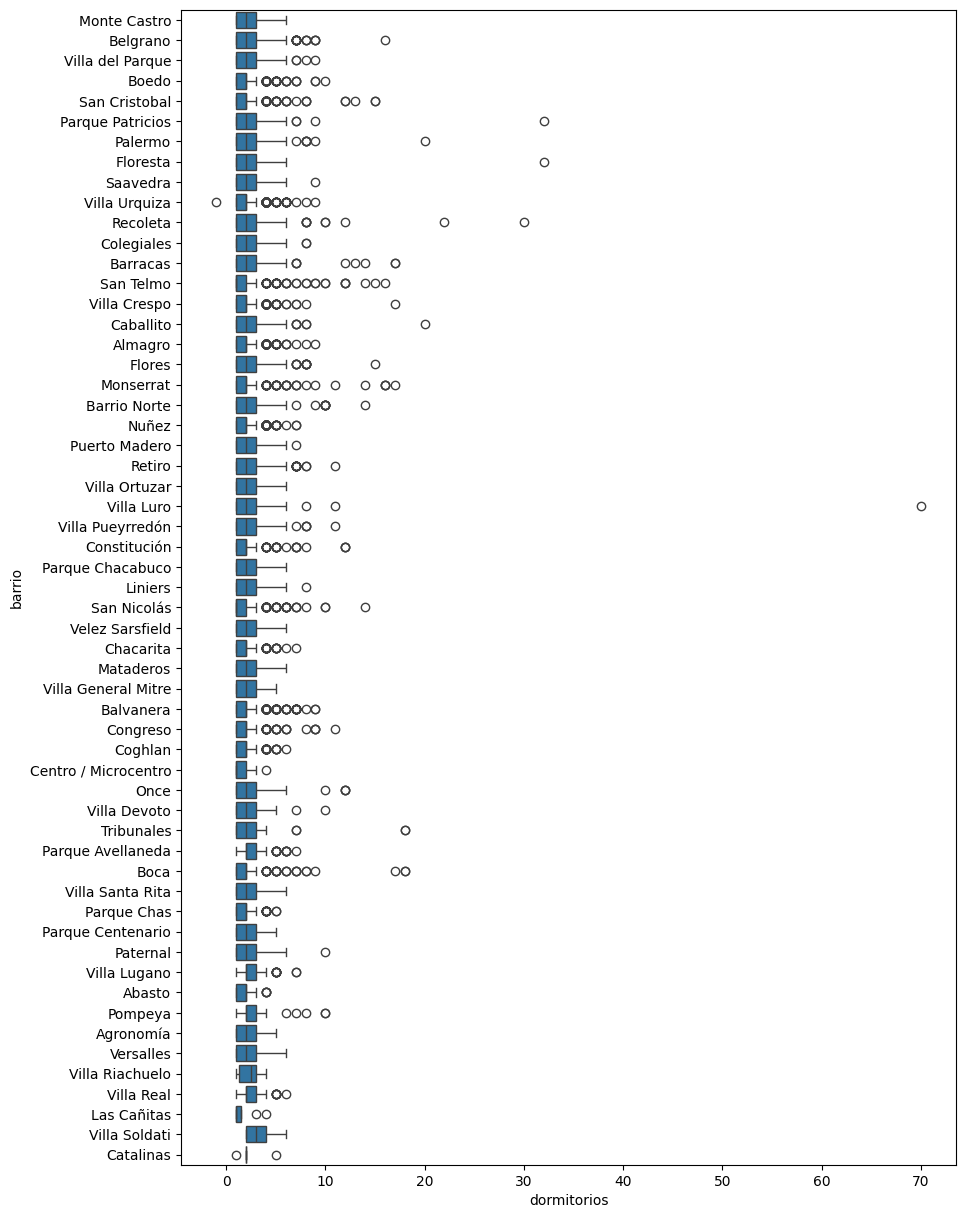

In [184]:
plt.figure(figsize = (10,15))
sns.boxplot(y='barrio', x='dormitorios', data=propiedades_train)
plt.show()

Comparando este segundo grafico con el anterior, vemos que existen **outliers** que directamente, no tienen sentido. Por ejemplo, segun ambos graficos existe una propiedad con 70 dormitorios, cuando no hay ninguna propiedad que supere los 40 ambientes.

Con esto confirmamos no solo la presencia de **outliers**, sino tambien de errores que carecen de sentido ya que no son posibles.

Con el mismo concepto, comparamos los graficos de *barrios* y *superficie total*, con el de *barrios* y *superficie cubierta*.

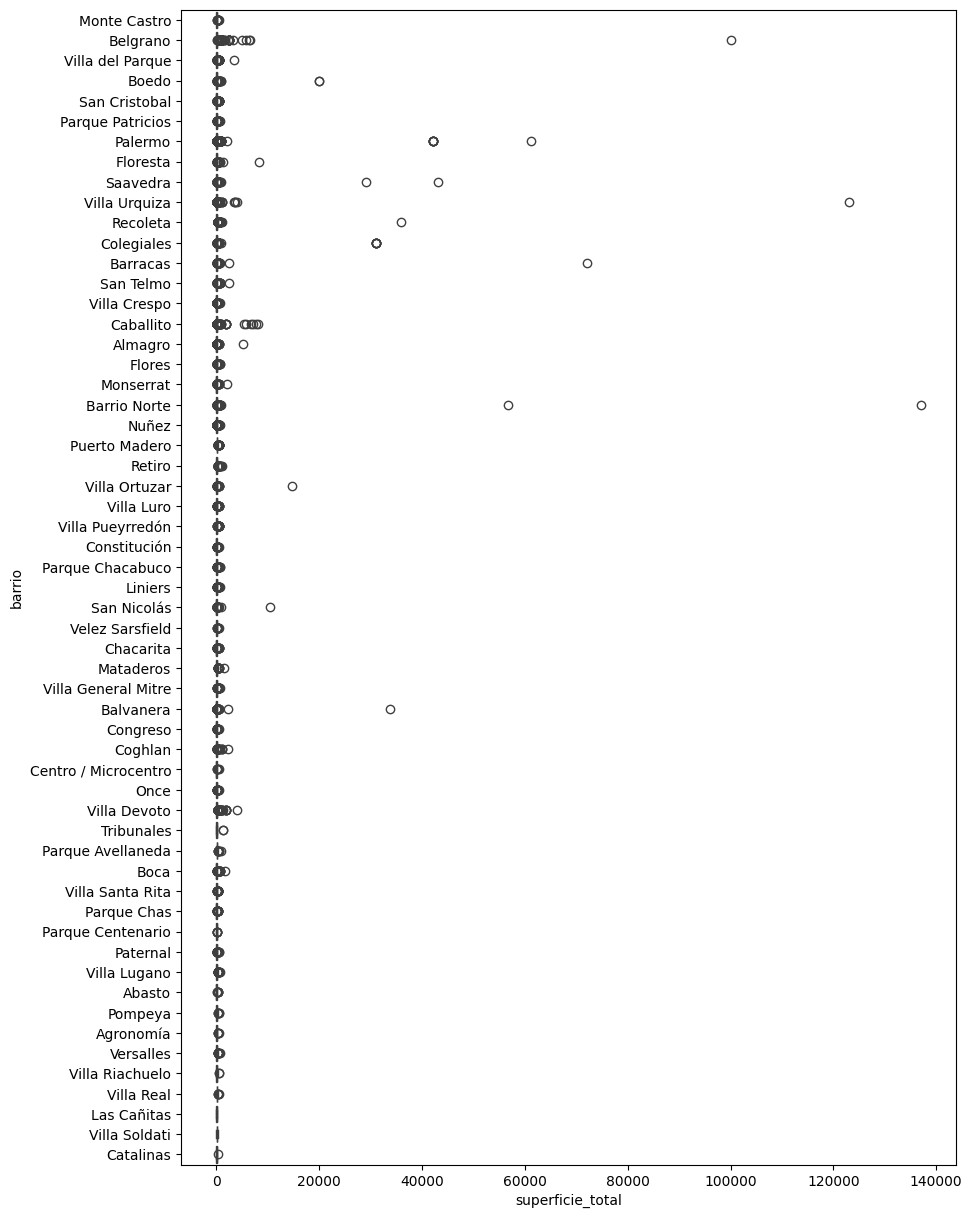

In [185]:
plt.figure(figsize = (10,15))
sns.boxplot(y='barrio', x='superficie_total', data=propiedades_train)
plt.show()

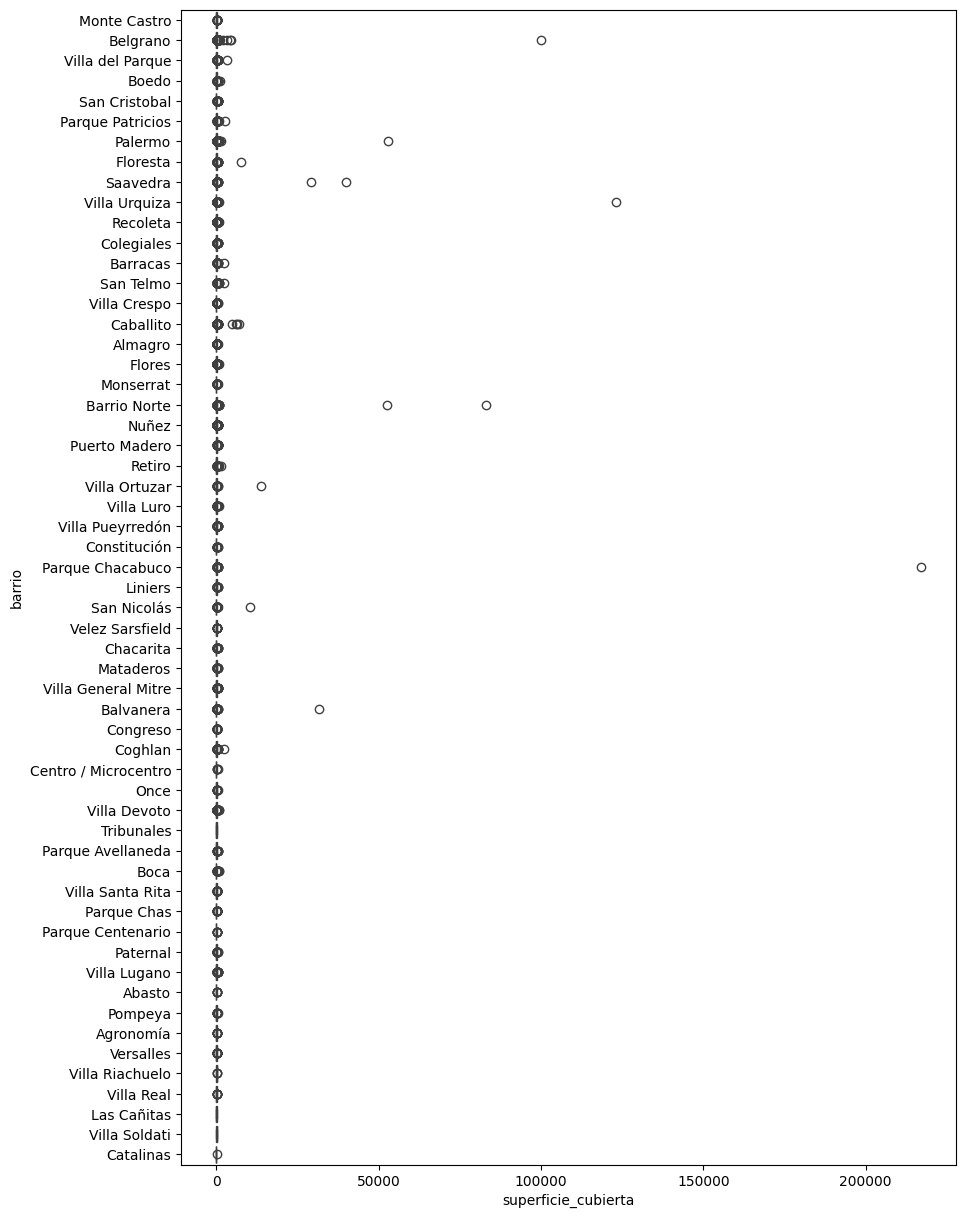

In [186]:
plt.figure(figsize = (10,15))
sns.boxplot(y='barrio', x='superficie_cubierta', data=propiedades_train)
plt.show()

Con estos ultimos dos graficos, tenemos el mismo escenario que con los primeros dos. No es posible que exista una propiedad con mas *superfice cubierta* que *superficie total*, ya que tambien carece de sentido.

Por lo tanto, tambien podemos confirmar que ademas de outliers existen errores en las variables de *superficie total* y *superficie cubierta*.

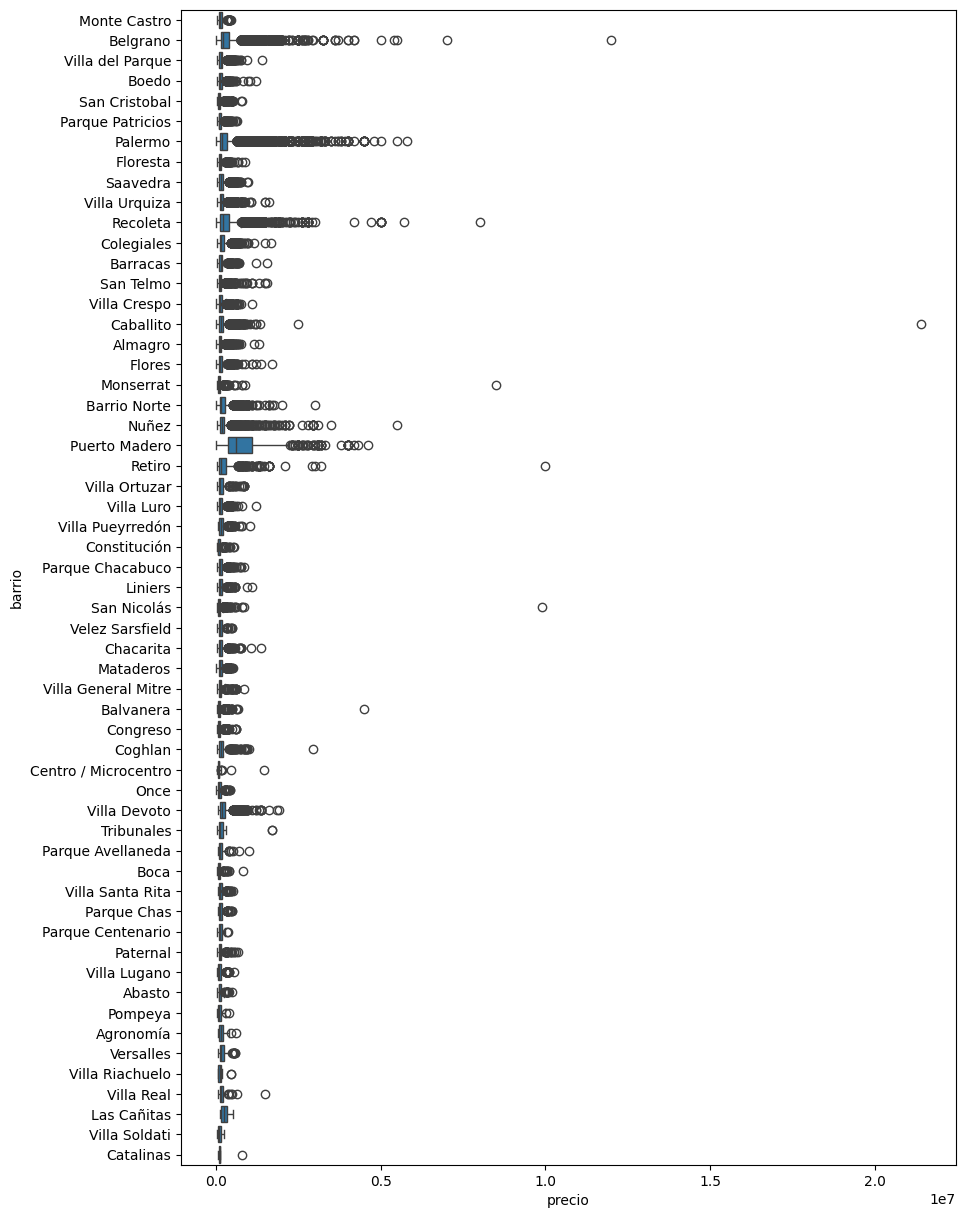

In [187]:
plt.figure(figsize = (10,15))
sns.boxplot(y='barrio', x='precio', data=propiedades_train)
plt.show()

Por ultimo, realizamos este BoxPlot de *precio* por *barrio* para observar los **outliers** existentes.

Ademas observamos que, a pesar de estos **outliers**, hay algunos barrios que se distinguen del resto ya que su rango intercuartilico se separa mas del 0, particularmente *Puerto Madero*.

### Subdivisiones y Otras Variables

Segundo, relacionamos mediante BoxPlots las *subdivisiones* con la cantidad de *ambientes*, la *superficie total*, y el *precio*.

Este analisis nos va a servir para determinar la utilidad de la informacion de esta variable, si aporta informacion importante incluso para las propiedades ubicadas en Palermo, o si es irrelevante a que subdivision de Palermo pertenecen.

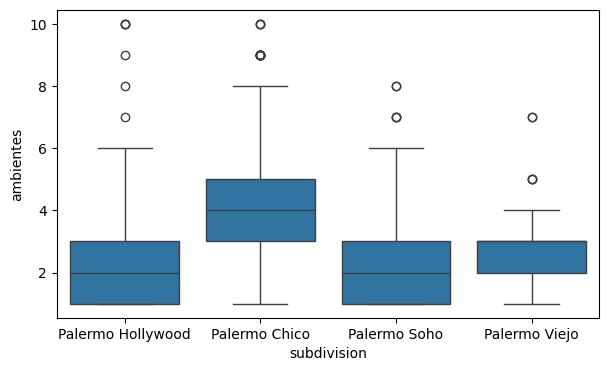

In [188]:
plt.figure(figsize = (7,4))
sns.boxplot(x='subdivision', y='ambientes', data=propiedades_train)
plt.show()

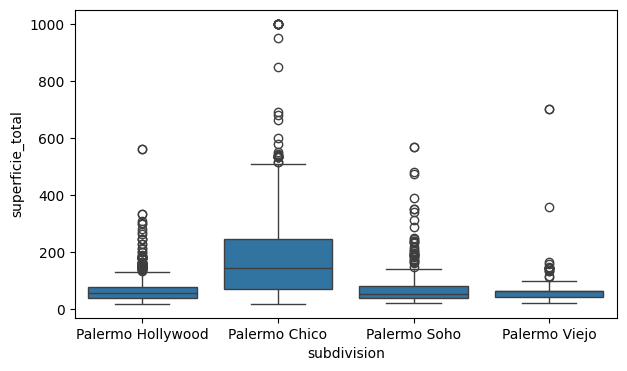

In [189]:
plt.figure(figsize = (7,4))
sns.boxplot(x='subdivision', y='superficie_total', data=propiedades_train)
plt.show()

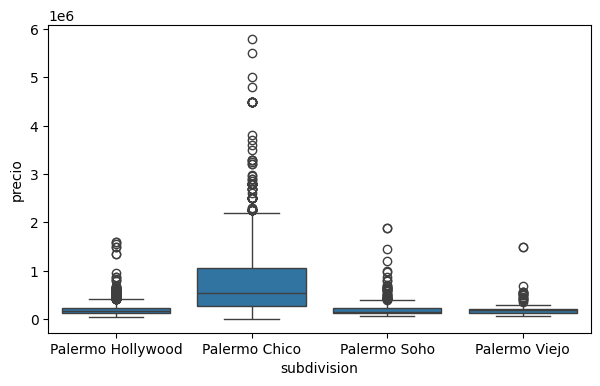

In [190]:
plt.figure(figsize = (7,4))
sns.boxplot(x='subdivision', y='precio', data=propiedades_train)
plt.show()

A pesar de que la mayoria de propiedades de Palermo no tiene subdivision, vemos que las propiedades de Palermo Chico se destacan en todas las categorias por sobre las demas, que tienen valores similares.

## Datos Faltantes o Erroneos


En este apartado analizamos la presencia de datos faltantes en forma de datos nulos, y tambien todos los casos posibles de datos erroneos como por ejemplo datos negativos. En base a lo que encontremos, tomamos una decision que puede ser imputar una correccion, o simplemente eliminar esos datos.

Una vez terminado este proceso, vamos a reanalizar las distribuciones de las variables para comparar las diferencias con los datos anteriores a las siguientes imputaciones.

### Imputacion

#### Analisis de Datos Nulos

Para empezar, analizamos y graficamos el porcentaje de datos nulos por columna en el dataframe.

In [191]:
porcentajes = (propiedades_train.isna().sum() / len(propiedades_train)) * 100
cantidades_de_nan = propiedades_train.isna().sum()
claves = porcentajes.keys().tolist()
valores = porcentajes.values.tolist()
datos = {'variable': claves, 'porcentaje': valores , 'cantidad': cantidades_de_nan}
porcentajes_df = pd.DataFrame(data=datos)
porcentajes_df

,variable,porcentaje,cantidad
id,id,0.000000,0
fecha_inicio,fecha_inicio,0.000000,0
fecha_fin,fecha_fin,0.000000,0
latitud,latitud,3.950981,2979
longitud,longitud,3.950981,2979
barrio,barrio,0.432366,326
subdivision,subdivision,96.193583,72529
tipo,tipo,0.000000,0
ambientes,ambientes,1.119378,844
dormitorios,dormitorios,11.673895,8802


Text(0, 0.5, 'Variables')

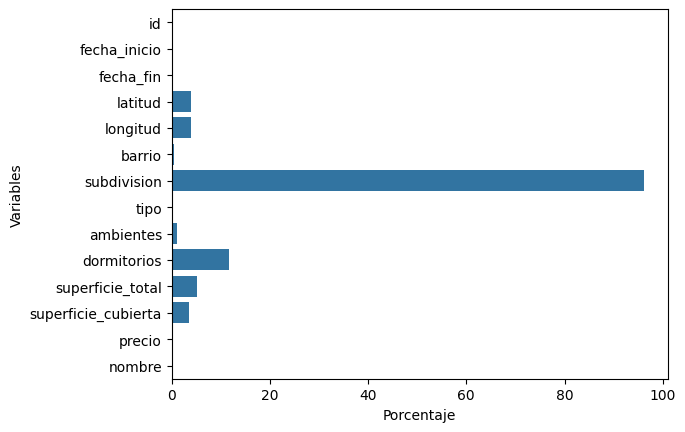

In [192]:
barplot = sns.barplot(x='porcentaje', y='variable', data=porcentajes_df)
barplot.set_xlabel('Porcentaje')
barplot.set_ylabel('Variables')

Repetimos el analisis, esta vez para visualizar el porcentaje de datos nulos por fila del dataframe, es decir, para ver cuantos nulos por fila hay.

In [193]:
propiedades_train.reset_index(inplace=True, drop=True)
propiedades_filas_nulas = propiedades_train.isna()
nulos = pd.Series(dtype=int, index=range(75399))

for indice, fila in propiedades_filas_nulas.iterrows():
  contador_nulos = 0
  for nombre_columna, valor in fila.items():
    if valor:
      contador_nulos += 1
  nulos[indice] = contador_nulos

propiedades_filas_nulas['nulos'] = nulos
propiedades_train['nulos'] = propiedades_filas_nulas['nulos']

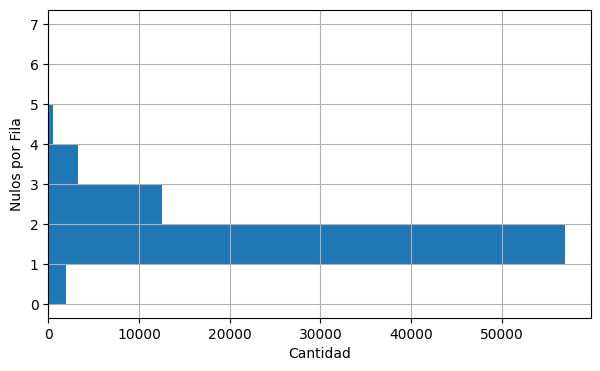

In [194]:
plt.figure(figsize=(7,4))
propiedades_train['nulos'].hist(orientation = "horizontal", bins = 7)
plt.xlabel('Cantidad')
plt.ylabel('Nulos por Fila')
plt.show()

#### Subdivision de Barrios

En base a los analisis de cantidad de datos nulos que acabamos de realizar, y a los analisis de los datos de la variable *subdivision* que realizamos en el apartado anterior, notamos que la mayoria de datos de la variable son nulos, y los datos que no son nulos son aquellos que pertenecen a propiedades ubicadas en Palermo.

In [195]:
propiedades_de_palermo = propiedades_train[propiedades_train['barrio'] == 'Palermo']
propiedades_de_palermo.shape

(11397, 15)

In [196]:
propiedades_de_palermo.isna().sum()

id                        0
fecha_inicio              0
fecha_fin                 0
latitud                 725
longitud                725
barrio                    0
subdivision            8527
tipo                      0
ambientes               120
dormitorios            1542
superficie_total        664
superficie_cubierta     533
precio                    0
nombre                    0
nulos                     0
dtype: int64

Pero el problema es que de las 11397 propiedades ubicadas en Palermo, 8527 poseen un dato nulo en su *subdivision*. Debido a la complejidad de rellenar estos datos, ya que no tenemos poseemos en nuestro dataset o en otros datasets los datos necesarios, y a que no perdemos informacion de ninguna propiedad y las podemos ubicar a todas en Palermo, decidimos eliminar la columna *subdivision*.

In [197]:
propiedades_train.drop(['subdivision'], axis=1, inplace=True)

#### Barrios y Coordenadas

Ahora analizamos las propiedades que posean coordenadas nulas.

In [198]:
propiedades_train.shape

(75399, 14)

In [199]:
propiedades_train[propiedades_train['barrio'].isna() &
                  propiedades_train['latitud'].isna() &
                  propiedades_train['longitud'].isna()].shape

(132, 14)

Observamos que la cantidad de propiedades que contienen *latitud*, *longitud* y *barrio* nulos a la vez, es de 132. Esta magnitud comparada con el total de registros que es 75399, y por lo tanto las consideramos despreciable y las eliminamos.

In [200]:
propiedades_sin_ubicacion_nula = propiedades_train[~(propiedades_train['barrio'].isna() &
                                                     propiedades_train['latitud'].isna() &
                                                     propiedades_train['longitud'].isna())]

propiedades_sin_ubicacion_nula[propiedades_sin_ubicacion_nula['barrio'].isna() &
                               propiedades_sin_ubicacion_nula['latitud'].isna() &
                               propiedades_sin_ubicacion_nula['longitud'].isna()].shape

(0, 14)

In [201]:
propiedades_sin_ubicacion_nula.shape

(75267, 14)

Ahora, ya sabiendo que no existen propiedades con ningun dato de su ubicacion, buscamos propiedades que posean sus coordenadas pero no el barrio donde se ubican.

In [202]:
propiedades_sin_ubicacion_nula[propiedades_sin_ubicacion_nula['barrio'].isna()].shape

(194, 14)

Observamos que la cantidad de registros que poseen *barrio* nulo pero que disponen de *latitud* y *longitud* son 194, suma que tambien consideraremos despreciable.

In [203]:
propiedades_sin_barrio_nulo = propiedades_sin_ubicacion_nula[~(propiedades_sin_ubicacion_nula['barrio'].isna())]
propiedades_sin_barrio_nulo.shape

(75073, 14)

Por ultimo, buscamos las propiedades con coordenadas nulas.

In [204]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['latitud'].isna() & propiedades_sin_barrio_nulo['longitud'].isna()].shape

(2847, 14)

Vemos que restan 2847 registros que no poseen ni *latitud* ni *longitud*, pero que si poseen *barrio*, y para rellenar los datos imputaremos las coordenadas mediante un geolocalizador.

In [205]:
coordenadas_bsas["centroide_x"] = coordenadas_bsas["geometry"].centroid.x
coordenadas_bsas["centroide_y"] = coordenadas_bsas["geometry"].centroid.y
propiedades_sin_barrio_nulo['barrio'].unique()

<ipython-input-205-2e54f8f6f133>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coordenadas_bsas["centroide_x"] = coordenadas_bsas["geometry"].centroid.x
<ipython-input-205-2e54f8f6f133>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coordenadas_bsas["centroide_y"] = coordenadas_bsas["geometry"].centroid.y


array(['Monte Castro', 'Belgrano', 'Villa del Parque', 'Boedo',
       'San Cristobal', 'Parque Patricios', 'Palermo', 'Floresta',
       'Saavedra', 'Villa Urquiza', 'Recoleta', 'Colegiales', 'Barracas',
       'San Telmo', 'Villa Crespo', 'Caballito', 'Almagro', 'Flores',
       'Monserrat', 'Barrio Norte', 'Nuñez', 'Puerto Madero', 'Retiro',
       'Villa Ortuzar', 'Villa Luro', 'Villa Pueyrredón', 'Constitución',
       'Parque Chacabuco', 'Liniers', 'San Nicolás', 'Velez Sarsfield',
       'Chacarita', 'Mataderos', 'Villa General Mitre', 'Balvanera',
       'Congreso', 'Coghlan', 'Centro / Microcentro', 'Once',
       'Villa Devoto', 'Tribunales', 'Parque Avellaneda', 'Boca',
       'Villa Santa Rita', 'Parque Chas', 'Parque Centenario', 'Paternal',
       'Villa Lugano', 'Abasto', 'Pompeya', 'Agronomía', 'Versalles',
       'Villa Riachuelo', 'Villa Real', 'Las Cañitas', 'Villa Soldati',
       'Catalinas'], dtype=object)

Antes de rellenar las coordenadas nulas, trabajamos el dataframe que contiene las coordenadas de los barrios de CABA para que los barrios coincidan con nuestro dataframe.

In [206]:
coordenadas_bsas.loc[coordenadas_bsas['BARRIO'] == 'CONSTITUCION', 'BARRIO'] = 'CONSTITUCIÓN'
coordenadas_bsas.loc[coordenadas_bsas['BARRIO'] == 'SAN NICOLAS', 'BARRIO'] = 'SAN NICOLÁS'
coordenadas_bsas.loc[coordenadas_bsas['BARRIO'] == 'VILLA PUEYRREDON', 'BARRIO'] = 'VILLA PUEYRREDÓN'
coordenadas_bsas.loc[coordenadas_bsas['BARRIO'] == 'AGRONOMIA', 'BARRIO'] = 'AGRONOMÍA'
coordenadas_bsas.loc[coordenadas_bsas['BARRIO'] == 'NUEVA POMPEYA', 'BARRIO'] = 'POMPEYA'
coordenadas_bsas.loc[coordenadas_bsas['BARRIO'] == 'VILLA GRAL. MITRE', 'BARRIO'] = 'VILLA GENERAL MITRE'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Once', 'barrio'] = 'Balvanera'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Abasto', 'barrio'] = 'Balvanera'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Congreso', 'barrio'] = 'Balvanera'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Barrio Norte', 'barrio'] = 'Recoleta'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Parque Centenario', 'barrio'] = 'Caballito'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Las Cañitas', 'barrio'] = 'Palermo'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Tribunales', 'barrio'] = 'San Nicolás'
propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['barrio'] == 'Centro / Microcentro', 'barrio'] = 'San Nicolás'


In [207]:
propiedades_sin_latitud = propiedades_sin_barrio_nulo[(propiedades_sin_barrio_nulo['latitud'].isna())&(propiedades_sin_barrio_nulo['id'])]
ids = propiedades_sin_latitud['id']
for id in ids:
  barrio = propiedades_sin_latitud.loc[propiedades_sin_latitud['id'] == id, 'barrio'].values[0]
  if not coordenadas_bsas.loc[coordenadas_bsas.BARRIO == barrio.upper()].empty:
    centroide_x = coordenadas_bsas.loc[coordenadas_bsas.BARRIO == barrio.upper(), 'centroide_x'].values[0]
    centroide_y = coordenadas_bsas.loc[coordenadas_bsas.BARRIO == barrio.upper(), 'centroide_y'].values[0]
    propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['id'] == id, 'latitud'] = centroide_y
    propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['id'] == id, 'longitud'] = centroide_x
propiedades_sin_barrio_nulo.isna().sum()

id                        0
fecha_inicio              0
fecha_fin                 0
latitud                   0
longitud                  0
barrio                    0
tipo                      0
ambientes               780
dormitorios            8701
superficie_total       3832
superficie_cubierta    2684
precio                    0
nombre                    0
nulos                     0
dtype: int64

Revisamos que, una vez hecho el reemplazo, no haya datos nulos en *latitud* y *longitud*.

#### Superficies

Seguimos analizando la cantidad de nulos en *superficie_total* y *superficie_cubierta*.

Primero buscamos casos en donde ambas variables sean nulas simultaneamente.

In [208]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['superficie_total'].isna() & propiedades_sin_barrio_nulo['superficie_cubierta'].isna()].shape

(0, 14)

Observamos que no existen dichos casos, y procedemos a buscar casos donde una de las dos es nula y la otra no.

In [209]:
propiedades_sin_barrio_nulo[~(propiedades_sin_barrio_nulo['superficie_total'].isna()) & propiedades_sin_barrio_nulo['superficie_cubierta'].isna()].shape

(2684, 14)

In [210]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['superficie_total'].isna() & ~(propiedades_sin_barrio_nulo['superficie_cubierta'].isna())].shape

(3832, 14)

Obtenemos 2684 casos en los que *superficie_total* es nulo, y otros 3832 casos donde *superficie_cubierta* es nulo.

Por lo tanto, procedemos a imputar los datos faltantes de cada columna a través de un metodo multivariado de imputacion con regresion lineal. Para aplicar este metodo, utilizamos los datos de las variables superficie_total, superficie_cubierta, y el tipo, transformando esta ultima a numeros (Departamento = 0, PH = 1, y Casa = 2).

In [211]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

columnas = ["superficie_total", "superficie_cubierta", "tipo"]
df_eliminar_nans = propiedades_sin_barrio_nulo[columnas].copy()
df_eliminar_nans.replace(to_replace={'Departamento': 0, 'PH': 1, 'Casa': 2}, inplace=True)

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,
                       missing_values=np.nan,
                       max_iter=100,
                       verbose=0,
                       random_state=0)
columnas_imputadas = imp.fit_transform(df_eliminar_nans)
superficies_predecidas = pd.DataFrame(columnas_imputadas)
superficies_predecidas.rename(columns={ 0: "superficie_total",
                                        1: "superficie_cubierta",
                                        2: "tipo"}, inplace=True)
print(superficies_predecidas.columns)
superficies_predecidas['superficie_total'] = round(superficies_predecidas['superficie_total'], 0)
superficies_predecidas['superficie_cubierta'] = round(superficies_predecidas['superficie_cubierta'], 0)

Index(['superficie_total', 'superficie_cubierta', 'tipo'], dtype='object')


Una vez terminado el metodo, creamos una tabla con los valores de las superficies predecidas.

In [212]:
superficies_predecidas

,superficie_total,superficie_cubierta,tipo
0,51.0,44.0,0.0
1,79.0,66.0,0.0
2,110.0,80.0,0.0
3,97.0,67.0,1.0
4,89.0,89.0,0.0
...,...,...,...
75068,100.0,75.0,0.0
75069,91.0,81.0,0.0
75070,43.0,36.0,0.0
75071,34.0,34.0,0.0


Con la tabla de arriba, reemplazamos los datos nulos con nuestras predicciones.

In [213]:
propiedades_sin_barrio_nulo.loc[:, 'superficie_total'] = superficies_predecidas['superficie_total']
propiedades_sin_barrio_nulo.loc[:, 'superficie_cubierta'] = superficies_predecidas['superficie_cubierta']

In [214]:
propiedades_sin_barrio_nulo.isna().sum()

id                        0
fecha_inicio              0
fecha_fin                 0
latitud                   0
longitud                  0
barrio                    0
tipo                      0
ambientes               780
dormitorios            8701
superficie_total        325
superficie_cubierta     325
precio                    0
nombre                    0
nulos                     0
dtype: int64

Como resultado, obtenemos que ya no existen propiedades con *superficie_total* o *superficie_cubierta* nulas.

Antes de seguir con otras variables, vamos a buscar si existen propiedades con mayor *superficie_cubierta* que *superficie_total*, algo que no tiene sentido y no es posible ya que los metros de *superficie_cubierta* estan incluidos en los metros de la *superficie_total*.

In [215]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['superficie_total'] < propiedades_sin_barrio_nulo['superficie_cubierta']].shape

(483, 14)

Para lidiar con los 484 casos en los que la condicion anterior se cumple, calculamos el promedio de valores de *superficie_cubierta* de cada grupo de propiedades, agrupadas en base a su *superficie_total*.

In [216]:
promedios_superficie = propiedades_sin_barrio_nulo.groupby('superficie_total')['superficie_cubierta'].mean()
promedios_superficie = promedios_superficie.round(decimals=0)

Una vez calculado los promedios, reemplazamos los casos en donde se cumpla la condicion con dichos promedios.

In [217]:
for indice, fila in propiedades_sin_barrio_nulo.iterrows():
    if ((fila['superficie_total'] < fila['superficie_cubierta']) and (fila['superficie_total'] >= 20)):
        cant_superficie_total = fila['superficie_total']
        valor = promedios_superficie.loc[cant_superficie_total]
        propiedades_sin_barrio_nulo.at[indice, 'superficie_cubierta'] = round(valor, 0)

Para los casos donde el promedio calculado siga siendo mayor a la *superficie_total*, empatamos el valor de la *superficie_cubierta* al de la *superficie_total*.

In [218]:
propiedades_superficie_cubierta_mayor_que_total = propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['superficie_total'] < propiedades_sin_barrio_nulo['superficie_cubierta']]
id_propiedades_superficie_cubierta_mayor_que_total = propiedades_superficie_cubierta_mayor_que_total['id'].tolist()

for id in id_propiedades_superficie_cubierta_mayor_que_total:
  superficie_total = propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['id'] == id, 'superficie_total'].values[0]
  propiedades_sin_barrio_nulo.loc[propiedades_sin_barrio_nulo['id'] == id, 'superficie_cubierta'] = superficie_total
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['id'].isin(id_propiedades_superficie_cubierta_mayor_que_total)]

,id,fecha_inicio,fecha_fin,latitud,longitud,barrio,tipo,ambientes,dormitorios,superficie_total,superficie_cubierta,precio,nombre,nulos
3995,SVAxRyMrm1qiwH/gnXiJMg==,2021-05-12,2021-06-05,-34.586010,-58.409378,Palermo,Departamento,4.0,3.0,10.0,10.0,930000.0,Excelente piso sobre Parque Las Heras,1.0
8690,jX7F+DG4leDQ+HmC/DS/KA==,2021-02-13,2021-03-18,-34.586424,-58.399957,Recoleta,Departamento,3.0,2.0,31.0,31.0,204000.0,Venta 3 ambientes con cochera Oportunidad,1.0
9013,plpBzI7Ejo57Q61yWXRooA==,2021-10-12,2021-10-20,-34.571146,-58.486675,Villa Urquiza,Departamento,1.0,NaN,589.0,589.0,85000.0,Venta Departamento 1 Amb. al frente en Villa U...,2.0
13668,dcQbIzjL4bQZ5wIpIPO7oA==,2021-09-02,2021-11-26,-34.586527,-58.398279,Recoleta,Departamento,2.0,1.0,12.0,12.0,87000.0,Departamento - Barrio Norte,1.0
15184,Ovi4i6TpqbRDjqx17FJ5vA==,2021-01-21,2021-02-23,-34.634588,-58.404880,Parque Patricios,Departamento,3.0,2.0,19.0,19.0,119000.0,Departamento - Parque Patricios,1.0
15809,K/kff2xj1i7u1jO1dInrBA==,2021-02-09,9999-12-31,-34.591604,-58.388306,Recoleta,Departamento,6.0,5.0,10.0,10.0,580000.0,Excelente vista con cochera y seguridad.,1.0
17720,EkEWNVE5eDcm3MFFEKN5oA==,2021-04-25,2021-06-05,-34.582936,-58.407010,Palermo,Departamento,2.0,1.0,1166.0,1166.0,155000.0,Departamento 2 amb c/balcón al frente c/vista ...,1.0
18377,kn3gRLW8PwqM5fgXbUKdWQ==,2021-06-01,2021-06-05,-34.633913,-58.465985,Flores,Departamento,3.0,2.0,686.0,686.0,168000.0,Departamento - Flores Sur,2.0
24308,JlNrKN2CggxwkXa1G27dZQ==,2021-10-16,2021-10-17,-34.621658,-58.391559,Parque Patricios,Departamento,1.0,NaN,19.0,19.0,59900.0,Venta Monoambiente a Estrenar,2.0
25030,S4Ye4Pwu28YANz0JFQCEcQ==,2021-02-25,2021-06-05,-34.564537,-58.470134,Belgrano,Departamento,2.0,1.0,1303.0,1303.0,135000.0,Departamento - Belgrano R,2.0


In [219]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['superficie_total'] < propiedades_sin_barrio_nulo['superficie_cubierta']].shape

(0, 14)

In [220]:
propiedades_sin_barrio_nulo.isna().sum()

id                        0
fecha_inicio              0
fecha_fin                 0
latitud                   0
longitud                  0
barrio                    0
tipo                      0
ambientes               780
dormitorios            8701
superficie_total        325
superficie_cubierta     325
precio                    0
nombre                    0
nulos                     0
dtype: int64

Una vez revisado que ya no existen nulos en ambas variables, y que tampoco existen casos que no son posibles, avanzamos a otras variables.

#### Ambientes y dormitorios

Para terminar, analizamos las relaciones entre *ambientes* y *dormitorios*.

In [221]:
propiedades_sin_barrio_nulo[~(propiedades_sin_barrio_nulo['ambientes'].isna()) & propiedades_sin_barrio_nulo['dormitorios'].isna()].shape

(8360, 14)

In [222]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['ambientes'].isna() & ~(propiedades_sin_barrio_nulo['dormitorios'].isna())].shape

(439, 14)

In [223]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['ambientes'].isna() & propiedades_sin_barrio_nulo['dormitorios'].isna()].shape

(341, 14)

Observamos que de los 780 registros que tienen *ambientes* nulos, tenemos 341 registros que también tienen *dormitorios* nulos y, por otro lado, 439 que sí poseen datos concretos en *dormitorios*.

En este caso consideramos relevante imputar los datos de ambas columnas. Por lo tanto, comenzamos por imputar la columna *ambientes*.

In [224]:
print('Mediana de ambientes:', propiedades_sin_barrio_nulo['ambientes'].median())
print('Promedio de ambientes:', propiedades_sin_barrio_nulo['ambientes'].mean())
print('Moda de ambientes:', propiedades_sin_barrio_nulo['ambientes'].mode())

Mediana de ambientes: 3.0
Promedio de ambientes: 2.824276849770503
Moda de ambientes: 0    3.0
Name: ambientes, dtype: float64


Vemos que la mediana, la moda y el promedio de los valores presentes en la columna *ambientes* tienden a 3.
Por lo tanto imputaremos dicha columna con este último valor.

In [225]:
propiedades_filas_nulas = propiedades_sin_barrio_nulo.isna()
mediana_de_ambientes = propiedades_sin_barrio_nulo['ambientes'].median()

for indice, fila in propiedades_filas_nulas.iterrows():
  if ((fila[7]) & (fila[8]) & indice < len(propiedades_sin_barrio_nulo)):
    propiedades_sin_barrio_nulo.iloc[indice, [7]] = mediana_de_ambientes

IndexError: iloc cannot enlarge its target object

In [ ]:
propiedades_sin_barrio_nulo.isna().sum()

Observamos la cantidad de propiedades que tienen, tanto ambientes como dormitorios nulos, en simultaneo que deberían ser cero.

In [ ]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['ambientes'].isna() & propiedades_sin_barrio_nulo['dormitorios'].isna()].shape

Observamos la cantidad de propiedades que cuentan con dormitorios nulos, pero si tienen ambientes.

In [ ]:
propiedades_sin_barrio_nulo[~(propiedades_sin_barrio_nulo['ambientes'].isna()) & propiedades_sin_barrio_nulo['dormitorios'].isna()].shape

Vemos todos los casos de ambientes en el dataframe de propiedades.

In [ ]:
propiedades_sin_barrio_nulo['ambientes'].value_counts()

In [ ]:
propiedades_sin_barrio_nulo.groupby('ambientes')['dormitorios'].agg(['median', 'mean']).reset_index()

Creamos una lista de promedios de dormitorio, según sus ambientes para imputar en los casos donde dormitorios es nulo.

In [ ]:
promedios_dormitorios = propiedades_sin_barrio_nulo.groupby('ambientes')['dormitorios'].mean()
promedios_dormitorios = promedios_dormitorios.round(decimals=0)
promedios_dormitorios

Vemos que hay un único registro que tiene 35 ambientes, pero que posee `dormitorios` nulos. Por lo tanto, en una primera instancia decidimos imputar el valor de dormitorios a mano, con un valor de 17.

In [ ]:
promedios_dormitorios[35.0] = 17.0
promedios_dormitorios

In [ ]:
promedios_dormitorios.keys()


Recorremos el dataframe imputando los promedios.







In [ ]:
propiedades_filas_nulas = propiedades_sin_barrio_nulo.isna()
for indice, fila in propiedades_filas_nulas.iterrows():
  if (~(fila[7]) & (fila[8])):
    cant_ambientes = propiedades_sin_barrio_nulo.iloc[indice, [7]]
    valor = promedios_dormitorios[cant_ambientes]
    propiedades_sin_barrio_nulo.iloc[indice, [8]] = round(valor, 0)

In [ ]:
propiedades_sin_barrio_nulo.isna().sum()

In [ ]:
propiedades_sin_barrio_nulo[['ambientes', 'dormitorios']].sample(40)

In [ ]:
propiedades_sin_barrio_nulo['dormitorios'].value_counts()

Vemos que hay un dato que no es coherente ya que no puede haber una cantidad de dormitorios negativa. Por lo tanto, consideraremos a este dato como mal ingresado, y supondremos que su valor real es 1. Por consecuente, lo cambiaremos manualmente.

In [ ]:
propiedades_sin_barrio_nulo = propiedades_sin_barrio_nulo.replace(to_replace=-1.0, value=1.0)
propiedades_sin_barrio_nulo['dormitorios'].value_counts()

In [ ]:
propiedades_sin_barrio_nulo.groupby('dormitorios')['ambientes'].agg(['median', 'mean']).reset_index()

Creamos una lista de promedios de dormitorio, según sus ambientes para imputar en los casos donde dormitorios es mayor que ambientes, cosa que no puede pasar.

In [ ]:
promedios_dormitorios = propiedades_sin_barrio_nulo[~(propiedades_sin_barrio_nulo['ambientes'].isna() & propiedades_sin_barrio_nulo['dormitorios'].isna())]#
promedios_dormitorios = promedios_dormitorios.groupby('dormitorios')['ambientes'].mean()
promedios_dormitorios

In [ ]:
propiedades_sin_barrio_nulo[propiedades_sin_barrio_nulo['ambientes'] < propiedades_sin_barrio_nulo['dormitorios']].shape

Recorremos el dataframe imputando los promedios.

In [ ]:
for indice, fila in propiedades_sin_barrio_nulo.iterrows():
  if (fila[7] < fila[8]):
    cant_ambientes = propiedades_sin_barrio_nulo.iloc[indice, [7]]
    valor = promedios_dormitorios[cant_ambientes]
    propiedades_sin_barrio_nulo.iloc[indice, [8]] = round(valor, 0)

Creamos una lista de promedios de ambientes según sus dormitorios, para imputar en los casos donde ambientes es nulo.

In [ ]:
promedios_ambientes = propiedades_sin_barrio_nulo.groupby('dormitorios')['ambientes'].mean()
promedios_ambientes = promedios_ambientes.round(decimals=0)
promedios_ambientes

In [ ]:
propiedades_sin_barrio_nulo.isna().sum()

Recorremos el dataframe imputando los promedios.

In [ ]:
propiedades_filas_nulas = propiedades_sin_barrio_nulo.isna()
for indice, fila in propiedades_filas_nulas.iterrows():
  if (fila[7] & ~(fila[8])):
    cant_dormitorios = propiedades_sin_barrio_nulo.iloc[indice, [8]]
    valor = promedios_ambientes[cant_dormitorios]
    propiedades_sin_barrio_nulo.iloc[indice, [7]] = round(valor, 0)

In [ ]:
propiedades_sin_barrio_nulo.isna().sum()

In [ ]:
propiedades_sin_barrio_nulo.drop_duplicates(subset=['fecha_inicio',
                                          'fecha_fin',
                                          'latitud',
                                          'longitud',
                                          'barrio',
                                          'tipo',
                                          'ambientes',
                                          'dormitorios',
                                          'superficie_total',
                                          'superficie_cubierta',
                                          'precio',
                                          'nombre',
                                          'nulos'],
                                            keep='last',
                                            ignore_index = True)

### Distribucion

En esta parte analizamos las distribuciones de las variables con diversos graficos, ya sea como un analisis inicial o complementario de lo ya realizado.

#### Distribucion de Variables Cualitativas

Primero, un TreeMap para observar la proporcion de todos los *barrios* del dataframe.

In [ ]:
valores = propiedades_sin_barrio_nulo['barrio'].value_counts()
llaves = propiedades_sin_barrio_nulo['barrio'].value_counts().keys()
plt.figure(figsize=(15, 7))
squarify.plot(sizes=valores,
              label = llaves,
              pad = 0.0 ,
              alpha = 1,
              color=sns.color_palette("magma", len(valores)),
              text_kwargs = {'fontsize': 6.56, 'color': 'white'})
plt.axis("off")

Segundo, un CountPlot para observar la proporcion de *tipos* de propiedades y confirmamos, con en el analisis ya realizado, una gran superioridad de *departamentos* por sobre el resto.

#### Distribucion de Variables Cuantitativas

Tercero, un BoxPlot para observar la distribucion de la cantidad de *ambientes*. Esto tambien sirve para visualizar posibles **outliers**.

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ambientes", data=propiedades_sin_barrio_nulo)

Cuarto, un BoxPlot para observar la distribucion de la *superficie total* de las propiedades. El grafico nos muestra que no solo la variable tiene **outliers**, sino que ademas esos valores no tienen sentido real, por lo que tendremos que trabajar detalladamente mas adelante.

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="superficie_total", data=propiedades_sin_barrio_nulo)

Quinto, un BoxPlot para observar la distribucion del *precio* de las propiedades. El grafico nos muestra que la variable tiene muchos outliers, y a pesar de que esos valores sean posibles, nos da la pauta de que puede haber errores que tendremos que analizar.

## Analisis de Valores Atipicos

####Coordenadas

In [ ]:
points = propiedades_sin_barrio_nulo[['longitud','latitud']]
points.dropna(inplace=True)
points = gp.GeoDataFrame(points, geometry=gp.points_from_xy(points.longitud, points.latitud))
points.reset_index(inplace=True,drop=True)
fx, ax = plt.subplots(figsize=(10,10))
coordenadas_bsas.plot(ax=ax,column='BARRIO',alpha=0.8)
points.plot(ax=ax)

Corrijo coordenadas outlier

In [ ]:
propiedades_sin_barrio_nulo.loc[37328, 'latitud'] = -34.658373 #mataderos
propiedades_sin_barrio_nulo.loc[37328, 'longitud'] = -58.501737

propiedades_sin_barrio_nulo.loc[9289	, 'latitud'] = -34.636803 #flores
propiedades_sin_barrio_nulo.loc[9289	, 'longitud'] = -58.458268

propiedades_sin_barrio_nulo.loc[34998, 'latitud'] = -34.658373
propiedades_sin_barrio_nulo.loc[34998, 'longitud'] = -58.501737

propiedades_sin_barrio_nulo.loc[47012, 'latitud'] = -34.658373
propiedades_sin_barrio_nulo.loc[47012, 'longitud'] = -58.501737

In [ ]:
points = propiedades_sin_barrio_nulo[['longitud','latitud']]
points.dropna(inplace=True)
points = gp.GeoDataFrame(points, geometry=gp.points_from_xy(points.longitud, points.latitud))
points.reset_index(inplace=True,drop=True)
fx, ax = plt.subplots(figsize=(10,10))
coordenadas_bsas.plot(ax=ax,column='BARRIO',alpha=0.8)
points.plot(ax=ax)

####Ambientes

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ambientes", data=propiedades_sin_barrio_nulo)

In [ ]:
plt.scatter(propiedades_sin_barrio_nulo['ambientes'], propiedades_sin_barrio_nulo['dormitorios'])
plt.title("Dispersograma Ambientes vs Dormitorios")
plt.xlabel("Ambientes")
plt.ylabel("Dormitorios")
plt.show()

In [ ]:
propiedades_con_outliers = propiedades_sin_barrio_nulo.sort_values('ambientes', ascending = False)
propiedades_con_outliers.head(5)

In [ ]:
propiedades_con_outliers.drop(5461, inplace = True)
propiedades_con_outliers.drop(33382, inplace = True)
propiedades_con_outliers.drop(47271, inplace = True)

In [ ]:
propiedades_con_outliers.loc[16388, 'ambientes'] = 4

propiedades_con_outliers.loc[49450, 'ambientes'] = 1
propiedades_con_outliers.loc[49450, 'dormitorios'] = 1

In [ ]:
propiedades_con_outliers.sort_values('ambientes', ascending = False, inplace = True)
propiedades_con_outliers.head(5)

In [ ]:
propiedades_con_outliers.drop(19305, inplace = True)

In [ ]:
propiedades_con_outliers.loc[7325, 'ambientes'] = 3

propiedades_con_outliers.loc[35898, 'ambientes'] = 3

In [ ]:
propiedades_con_outliers.loc[24246, 'ambientes'] = 2

In [ ]:
propiedades_con_outliers.sort_values('ambientes', ascending = False, inplace = True)
propiedades_con_outliers.head(5)

In [ ]:
propiedades_con_outliers.drop(51230, inplace = True)
propiedades_con_outliers.drop(10216, inplace = True)

In [ ]:
propiedades_con_outliers.sort_values('ambientes', ascending = False, inplace = True)
propiedades_con_outliers.head(20)

In [ ]:
propiedades_con_outliers.drop(15813, inplace = True)
propiedades_con_outliers.drop(37416, inplace = True)
propiedades_con_outliers.drop(56511, inplace = True)#elemento duplicado

In [ ]:
propiedades_con_outliers.sort_values('ambientes', ascending = False, inplace = True)
propiedades_con_outliers.head(10)

In [ ]:
propiedades_con_outliers.drop(66738, inplace = True)
propiedades_con_outliers.drop(54530, inplace = True)

In [ ]:
propiedades_con_outliers.sort_values('ambientes', ascending = False, inplace = True)
propiedades_con_outliers.head(20)

In [ ]:
propiedades_con_outliers.drop(13294, inplace = True)
propiedades_con_outliers.drop(9259, inplace = True)
propiedades_con_outliers.drop(14301, inplace = True)
propiedades_con_outliers.drop(47929, inplace = True)
propiedades_con_outliers.drop(56777, inplace = True) #duplicado

In [ ]:
propiedades_con_outliers.loc[3996, 'ambientes'] = 1

propiedades_con_outliers.loc[60569, 'ambientes'] = 10
propiedades_con_outliers.loc[60569, 'dormitorios'] = 6 #imputamos por promedio de propiedades con 10 ambientes

In [ ]:
propiedades_con_outliers.sort_values('ambientes', ascending = False, inplace = True)
propiedades_con_outliers.head(30)

In [ ]:
propiedades_con_outliers.drop(74493, inplace = True)
propiedades_con_outliers.drop(21447, inplace = True)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="ambientes", data=propiedades_con_outliers)

###dormitorios

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="dormitorios", data=propiedades_con_outliers)

In [ ]:
plt.scatter(propiedades_con_outliers['ambientes'], propiedades_con_outliers['dormitorios'])
plt.title("Dispersograma Ambientes vs Dormitorios")
plt.xlabel("Ambientes")
plt.ylabel("Dormitorios")
plt.show()

In [ ]:
propiedades_con_outliers.sort_values('dormitorios', ascending = False, inplace=True)
propiedades_con_outliers.head(30)

In [ ]:
propiedades_con_outliers.drop(36863, inplace = True)

In [ ]:
propiedades_agrupadas = propiedades_con_outliers.groupby(['tipo', 'ambientes', 'precio']).agg({'dormitorios': ['mean']}).reset_index()
propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['ambientes'] == 17)]
propiedades_buscada['dormitorios'].mean()

In [ ]:
propiedades_con_outliers.loc[68116, 'dormitorios'] = 14

In [ ]:
propiedades_agrupadas = propiedades_con_outliers.groupby(['tipo', 'ambientes', 'precio']).agg({'dormitorios': ['mean']}).reset_index()
propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Casa') & (propiedades_agrupadas['ambientes'] == 16)]
propiedades_buscada['dormitorios'].mean()

In [ ]:
propiedades_con_outliers.loc[70610, 'dormitorios'] = 14

In [ ]:
propiedades_agrupadas = propiedades_con_outliers.groupby(['tipo', 'ambientes', 'precio']).agg({'dormitorios': ['mean']}).reset_index()
propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Casa') & (propiedades_agrupadas['ambientes'] == 12)]
propiedades_buscada['dormitorios'].mean()

In [ ]:
propiedades_con_outliers.loc[13766, 'dormitorios'] = 8

In [ ]:
propiedades_agrupadas = propiedades_con_outliers.groupby(['tipo', 'ambientes', 'precio']).agg({'dormitorios': ['mean']}).reset_index()
propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'PH') & (propiedades_agrupadas['ambientes'] == 12)]
propiedades_buscada['dormitorios'].mean()

In [ ]:
propiedades_con_outliers.loc[55087, 'dormitorios'] = 9

In [ ]:
propiedades_agrupadas = propiedades_con_outliers.groupby(['tipo', 'ambientes', 'precio']).agg({'dormitorios': ['mean']}).reset_index()
propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Casa') & (propiedades_agrupadas['ambientes'] == 11)]
propiedades_buscada['dormitorios'].mean()

In [ ]:
propiedades_con_outliers.loc[22855, 'dormitorios'] = 7

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="dormitorios", data=propiedades_con_outliers)

In [ ]:
plt.scatter(propiedades_con_outliers['ambientes'], propiedades_con_outliers['dormitorios'])
plt.title("Dispersograma Ambientes vs Dormitorios")
plt.xlabel("Ambientes")
plt.ylabel("Dormitorios")
plt.show()

### Superficie

#### Superficie total

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="superficie_total", data=propiedades_con_outliers)

In [ ]:
plt.scatter(propiedades_con_outliers['superficie_total'], propiedades_con_outliers['superficie_cubierta'])
plt.title("Dispersograma superficie_total vs superficie_cubierta")
plt.xlabel("superficie_total")
plt.ylabel("superficie_cubierta")
plt.show()

In [ ]:
propiedades_con_outliers.sort_values('superficie_total', ascending = True, inplace=True)
propiedades_con_outliers.head(40)

Convencion nuestra, propiedades con terreno menor a 20 mt2 no son posibles => Se eliminan

In [ ]:
propiedades_con_outliers_en_superficie = propiedades_con_outliers[propiedades_con_outliers['superficie_total'] >= 20]
propiedades_con_outliers_en_superficie.shape

In [ ]:
propiedades_con_outliers_en_superficie.sort_values('superficie_total', ascending = True, inplace=True)
propiedades_con_outliers_en_superficie.head(40)

In [ ]:
propiedades_con_outliers_en_superficie.drop(38145, inplace = True)
propiedades_con_outliers_en_superficie.drop(34607, inplace = True)

In [ ]:
propiedades_con_outliers_en_superficie.loc[39552, 'superficie_total'] = 137

propiedades_con_outliers_en_superficie.loc[60242, 'superficie_total'] = 123
propiedades_con_outliers_en_superficie.loc[60242, 'superficie_cubierta'] = 123

propiedades_con_outliers_en_superficie.loc[18633, 'superficie_total'] = 36

propiedades_con_outliers_en_superficie.loc[11155, 'superficie_total'] = 31

propiedades_con_outliers_en_superficie.loc[37357, 'superficie_total'] = 31

propiedades_con_outliers_en_superficie.loc[5054, 'superficie_total'] = 31

propiedades_con_outliers_en_superficie.loc[14772, 'superficie_total'] = 31

propiedades_con_outliers_en_superficie.loc[26147, 'superficie_total'] = 31

propiedades_con_outliers_en_superficie.loc[7200, 'superficie_total'] = 31

propiedades_con_outliers_en_superficie.loc[20703, 'superficie_total'] = 41

In [ ]:
propiedades_con_outliers_en_superficie.sort_values('superficie_total', ascending = False, inplace=True)
propiedades_con_outliers_en_superficie.head(40)

In [ ]:
propiedades_agrupadas = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                          'ambientes',
                                                          'dormitorios',]).agg({'superficie_total': ['median'],
                                                                          'superficie_cubierta': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Departamento') &
                                            (propiedades_agrupadas['ambientes'] == 4) &
                                            (propiedades_agrupadas['dormitorios'] == 3)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_buscada['superficie_cubierta'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[59414, 'superficie_total'] = 112
propiedades_con_outliers_en_superficie.loc[59414, 'superficie_cubierta'] = 100



---



In [ ]:
propiedades_agrupadas_con_superficie_cubierta = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                                                  'ambientes',
                                                                                  'dormitorios',
                                                                                  'superficie_cubierta']).agg({'superficie_total': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas_con_superficie_cubierta[(propiedades_agrupadas_con_superficie_cubierta['tipo'] == 'Departamento') &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['ambientes'] == 4) &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['dormitorios'] == 3) &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['superficie_cubierta'] == 90)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[52433, 'superficie_total'] = 99



---



In [ ]:
propiedades_agrupadas = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                          'ambientes',
                                                          'dormitorios',]).agg({'superficie_total': ['median'],
                                                                          'superficie_cubierta': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Departamento') &
                                            (propiedades_agrupadas['ambientes'] == 2) &
                                            (propiedades_agrupadas['dormitorios'] == 1)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_buscada['superficie_cubierta'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[37971, 'superficie_total'] = 48
propiedades_con_outliers_en_superficie.loc[37971, 'superficie_cubierta'] = 42

propiedades_con_outliers_en_superficie.loc[46275, 'superficie_total'] = 48
propiedades_con_outliers_en_superficie.loc[46275, 'superficie_cubierta'] = 42

propiedades_con_outliers_en_superficie.loc[61183, 'superficie_total'] = 48
propiedades_con_outliers_en_superficie.loc[61183, 'superficie_cubierta'] = 42



---



In [ ]:
propiedades_agrupadas_con_superficie_cubierta = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                                                  'ambientes',
                                                                                  'dormitorios',
                                                                                  'superficie_cubierta']).agg({'superficie_total': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas_con_superficie_cubierta[(propiedades_agrupadas_con_superficie_cubierta['tipo'] == 'Departamento') &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['ambientes'] == 4) &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['dormitorios'] == 3) &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['superficie_cubierta'] == 222)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[72325	, 'superficie_total'] = 222

In [ ]:
propiedades_agrupadas_con_superficie_cubierta = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                                                  'ambientes',
                                                                                  'dormitorios',
                                                                                  'superficie_cubierta']).agg({'superficie_total': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas_con_superficie_cubierta[(propiedades_agrupadas_con_superficie_cubierta['tipo'] == 'Departamento') &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['ambientes'] == 5) &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['dormitorios'] == 4)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[22781, 'superficie_total'] = 439

propiedades_con_outliers_en_superficie.loc[16202, 'superficie_total'] = 439

propiedades_con_outliers_en_superficie.loc[68067, 'superficie_total'] = 439

propiedades_con_outliers_en_superficie.loc[15846, 'superficie_total'] = 439

In [ ]:
propiedades_agrupadas_con_superficie_cubierta = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                                                  'ambientes',
                                                                                  'dormitorios',
                                                                                  'superficie_cubierta']).agg({'superficie_total': ['mean']}).reset_index()

propiedades_buscada = propiedades_agrupadas_con_superficie_cubierta[(propiedades_agrupadas_con_superficie_cubierta['tipo'] == 'Departamento') &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['ambientes'] == 4) &
                                                                    (propiedades_agrupadas_con_superficie_cubierta['dormitorios'] == 3)]

propiedades_buscada['superficie_total'].mode()

In [ ]:
propiedades_con_outliers_en_superficie.loc[6572, 'superficie_total'] = 340



---



In [ ]:
propiedades_agrupadas = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                          'ambientes',
                                                          'dormitorios',]).agg({'superficie_total': ['median'],
                                                                                'superficie_cubierta': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Departamento') &
                                            (propiedades_agrupadas['ambientes'] == 2) &
                                            (propiedades_agrupadas['dormitorios'] == 1)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_buscada['superficie_cubierta'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[9819, 'superficie_total'] = 48
propiedades_con_outliers_en_superficie.loc[9819, 'superficie_cubierta'] = 42



---



In [ ]:
propiedades_agrupadas = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                          'ambientes',
                                                          'dormitorios',]).agg({'superficie_total': ['median'],
                                                                                'superficie_cubierta': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Departamento') &
                                            (propiedades_agrupadas['ambientes'] == 1) &
                                            (propiedades_agrupadas['dormitorios'] == 1)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_buscada['superficie_cubierta'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[14518, 'superficie_total'] = 36
propiedades_con_outliers_en_superficie.loc[14518, 'superficie_cubierta'] = 32



---



In [ ]:
propiedades_agrupadas = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                          'ambientes',
                                                          'dormitorios',]).agg({'superficie_total': ['median'],
                                                                                'superficie_cubierta': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'PH') &
                                            (propiedades_agrupadas['ambientes'] == 4) &
                                            (propiedades_agrupadas['dormitorios'] == 3)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_buscada['superficie_cubierta'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[14730, 'superficie_total'] = 133
propiedades_con_outliers_en_superficie.loc[14730, 'superficie_cubierta'] = 97

propiedades_con_outliers_en_superficie.loc[37695, 'superficie_total'] = 133
propiedades_con_outliers_en_superficie.loc[37695, 'superficie_cubierta'] = 97



---



In [ ]:
propiedades_agrupadas = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                          'ambientes',
                                                          'dormitorios',]).agg({'superficie_total': ['median'],
                                                                                'superficie_cubierta': ['median']}).reset_index()

propiedades_buscada = propiedades_agrupadas[(propiedades_agrupadas['tipo'] == 'Departamento') &
                                            (propiedades_agrupadas['ambientes'] == 5) &
                                            (propiedades_agrupadas['dormitorios'] == 4)]

propiedades_buscada['superficie_total'].mean()

In [ ]:
propiedades_buscada['superficie_cubierta'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.loc[11625, 'superficie_total'] = 188
propiedades_con_outliers_en_superficie.loc[11625, 'superficie_cubierta'] = 165



---



In [ ]:
propiedades_con_outliers_en_superficie.sort_values('superficie_total', ascending = False, inplace=True)
propiedades_con_outliers_en_superficie.head(40)

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="superficie_total", data=propiedades_con_outliers_en_superficie)

In [ ]:
plt.scatter(propiedades_con_outliers_en_superficie['superficie_total'], propiedades_con_outliers_en_superficie['superficie_cubierta'])
plt.title("Dispersograma superficie_total vs superficie_cubierta")
plt.xlabel("superficie_total")
plt.ylabel("superficie_cubierta")
plt.show()

In [ ]:
propiedades_con_outliers_en_superficie.sort_values('superficie_cubierta', ascending = False, inplace=True)
propiedades_con_outliers_en_superficie.head(40)

##Precio Univariadamente

In [ ]:
def z_mod_calculation(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / MAD

In [ ]:
propiedades_con_outliers_en_superficie["zm_precio"] =  z_mod_calculation(propiedades_con_outliers_en_superficie.precio)

In [ ]:
propiedades_con_outliers_en_superficie.head()

In [ ]:
propiedades_con_outliers_en_superficie[(propiedades_con_outliers_en_superficie["zm_precio"] > 3.5)]

In [ ]:
propiedades_con_outliers_en_superficie[(propiedades_con_outliers_en_superficie["zm_precio"] < -3.5)].shape

In [ ]:
propiedades_con_outliers_en_superficie[(propiedades_con_outliers_en_superficie["zm_precio"] > 3.5)].shape

In [ ]:
propiedades_con_outliers_en_superficie.sort_values('precio', ascending=False)

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="precio", data=propiedades_con_outliers_en_superficie)

In [ ]:
plt.figure(figsize = (10,8))
heatmap_de_propiedades = propiedades_con_outliers_en_superficie.drop(['id',
                                                 'fecha_inicio',
                                                 'fecha_fin',
                                                 'barrio',
                                                 'tipo',
                                                 'nombre'],
                                                axis='columns')
sns.heatmap(heatmap_de_propiedades.corr(), annot = True, cmap='coolwarm')

In [ ]:
propiedades_con_outliers_en_superficie_bkp = propiedades_con_outliers_en_superficie.copy()

In [ ]:
propiedades_con_outliers_en_superficie = propiedades_con_outliers_en_superficie_bkp

In [ ]:
propiedades_agrupadas_con_precio = propiedades_con_outliers_en_superficie.groupby(['tipo',
                                                                                  'ambientes',
                                                                                  'dormitorios',
                                                                                  'superficie_total',
                                                                                  'superficie_cubierta']).agg({'precio': ['median']}).reset_index()

def calcular_precio_a_imputar(tipo, ambientes, sup_total):
  propiedades_buscada = propiedades_agrupadas_con_precio[(propiedades_agrupadas_con_precio['tipo'] == tipo) &
                                                          (propiedades_agrupadas_con_precio['ambientes'] == ambientes) &
                                                          (propiedades_agrupadas_con_precio['superficie_total'] == sup_total)]
  return propiedades_buscada['precio'].mean()

In [ ]:
propiedades_con_outliers_en_superficie.reset_index(inplace = True, drop = True)
propiedades_con_outliers_en_superficie

In [ ]:
propiedades_zscore_precio_excedido = propiedades_con_outliers_en_superficie[propiedades_con_outliers_en_superficie['zm_precio'] > 3.5]

In [ ]:
#id_propiedades_precio_excedido = propiedades_zscore_precio_excedido['id'].tolist()
#serie_de_precios = []
#for id in id_propiedades_precio_excedido:
#  tipo = propiedades_con_outliers_en_superficie.loc[propiedades_con_outliers_en_superficie['id'] == id, 'tipo'].values[0]
#  ambientes = propiedades_con_outliers_en_superficie.loc[propiedades_con_outliers_en_superficie['id'] == id, 'ambientes'].values[0]
#  sup_total = propiedades_con_outliers_en_superficie.loc[propiedades_con_outliers_en_superficie['id'] == id, 'superficie_total'].values[0]
#  #precio_a_imputar = calcular_precio_a_imputar(tipo, ambientes, sup_total)
#
#  propiedades_buscada = propiedades_agrupadas_con_precio[(propiedades_agrupadas_con_precio['tipo'] == tipo) &
#                                                          (propiedades_agrupadas_con_precio['ambientes'] == ambientes) &
#                                                          (propiedades_agrupadas_con_precio['superficie_total'] == sup_total)]
#  serie_de_precios.append(propiedades_buscada['precio'].mean())
#  #precio_a_imputar = propiedades_buscada['precio'].mean()
#  #propiedades_con_outliers_en_superficie.loc[propiedades_con_outliers_en_superficie['id'] == id, 'precio'] = precio_a_imputar
##propiedades_con_outliers_en_superficie[propiedades_con_outliers_en_superficie['id'].isin(id_propiedades_precio_excedido)]
##propiedades_con_outliers_en_superficie
#serie_de_precios






serie_de_precios = []
for indice, fila in propiedades_zscore_precio_excedido.iterrows():
  id = fila['id']
  tipo = propiedades_con_outliers_en_superficie.loc[propiedades_con_outliers_en_superficie['id'] == id, 'tipo'].values[0]
  ambientes = propiedades_con_outliers_en_superficie.loc[propiedades_con_outliers_en_superficie['id'] == id, 'ambientes'].values[0]
  sup_total = propiedades_con_outliers_en_superficie.loc[propiedades_con_outliers_en_superficie['id'] == id, 'superficie_total'].values[0]

  propiedades_buscada = propiedades_agrupadas_con_precio[(propiedades_agrupadas_con_precio['tipo'] == tipo) &
                                                         (propiedades_agrupadas_con_precio['ambientes'] == ambientes) &
                                                         (propiedades_agrupadas_con_precio['superficie_total'] == sup_total)]
  serie_de_precios.append(propiedades_buscada['precio'].mean())

propiedades_con_outliers_en_superficie
serie_de_precios

In [ ]:
#for indice, id in enumerate(id_propiedades_precio_excedido):
#  propiedades_con_outliers_en_superficie.iloc[indice, [11]] = serie_de_precios[indice]
#propiedades_con_outliers_en_superficie.isna().sum()
#for indice, id in enumerate(id_propiedades_precio_excedido):
#    for precio in serie_de_precios:
#        propiedades_con_outliers_en_superficie.loc[indice, 'precio'] = precio
#for indice, fila in propiedades_con_outliers_en_superficie.iterrows():
#   if indice < len(serie_de_precios):
#       propiedades_con_outliers_en_superficie.loc[indice, 'precio'] = serie_de_precios[indice]
#   else:
#       break
i = 0
for indice, fila in propiedades_zscore_precio_excedido.iterrows():
  propiedades_con_outliers_en_superficie.iloc[indice,[11]] = serie_de_precios[i]
  i += 1

In [ ]:
propiedades_con_outliers_en_superficie.sort_values('precio', ascending=False)

In [ ]:
calcular_precio_a_imputar('Departamento', 3.0, 40.0)

In [ ]:
propiedades_con_outliers_en_superficie.isna().sum()

In [ ]:
# Calulo el vector de medias
vmedias = np.mean(propiedades_con_outliers_en_superficie[["precio", "superficie_cubierta"]])

# Calculo la diferencia entre las observaciones y el vector de medias
x_dif = propiedades_con_outliers_en_superficie[["precio", "superficie_cubierta"]] - vmedias

# Calculo matriz de covarianza y su inversa
cov = propiedades_con_outliers_en_superficie[["precio", "superficie_cubierta"]].cov().values
inv_cov = np.linalg.inv(cov)

# Calculamos el cuadrado de la distancia de mahalanobis
mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

propiedades_con_outliers_en_superficie["mahalanobis"] = mahal.diagonal()

In [ ]:
propiedades_con_outliers_en_superficie.head()

In [ ]:
# Defino umbral
umbral = 7

# Observacione anómalas
propiedades_con_outliers_en_superficie[propiedades_con_outliers_en_superficie["mahalanobis"] > umbral]